In [226]:
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fattpkl = 'num_head_sweep_stratified_metrics.pkl'
sattpkl = 'transformer_stratified_metrics_df.pkl'
pbfdpkl = 'protbert_bfd_metrics_df.pkl'
grempkl = 'gremlin_stratified_metric_df.pkl'

with open(grempkl, 'rb') as f:
    grem_df = pkl.load(f)
with open(fattpkl, 'rb') as f:
    fatt_df = pkl.load(f)
with open(sattpkl, 'rb') as f:
    satt_df = pkl.load(f)
with open(pbfdpkl, 'rb') as f:
    pbfd_df = pkl.load(f)

In [263]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
    "font.size": 14,
})


In [264]:
full_df['short_pr_at_l_5'].min()

0.0

In [265]:
full_df = pd.concat([grem_df, fatt_df[fatt_df['num_attention_heads'] == 256], satt_df, pbfd_df])


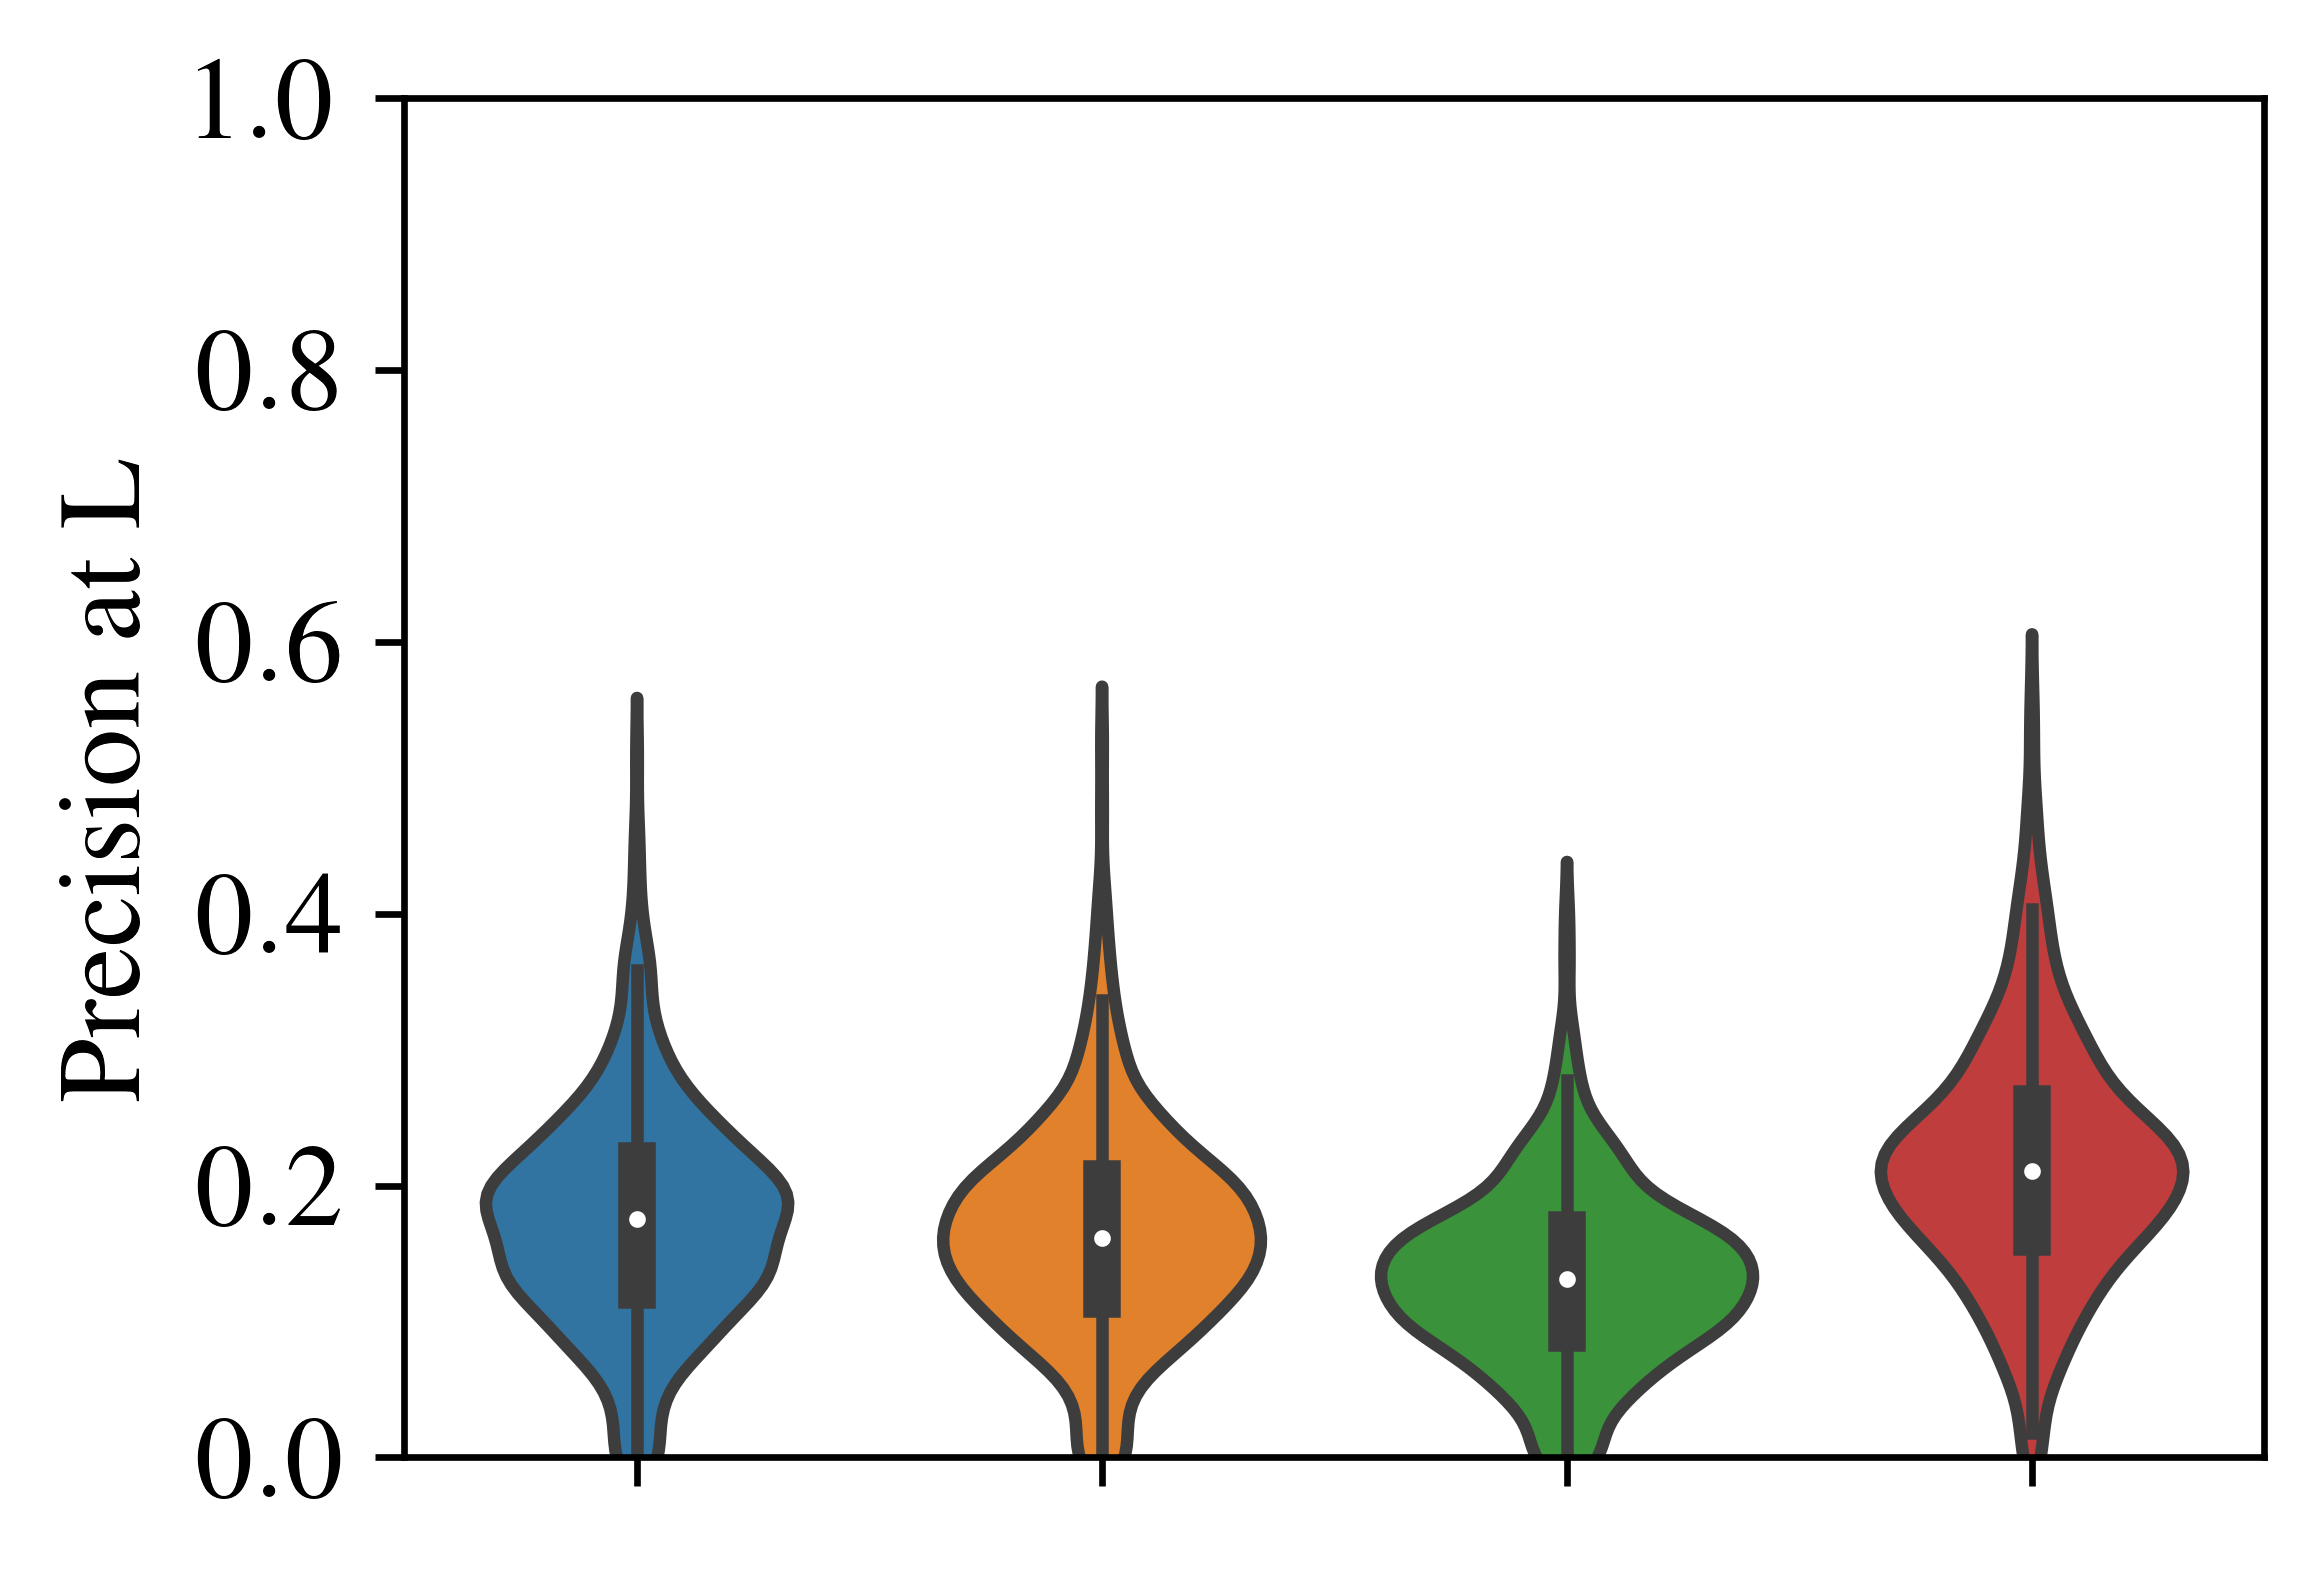

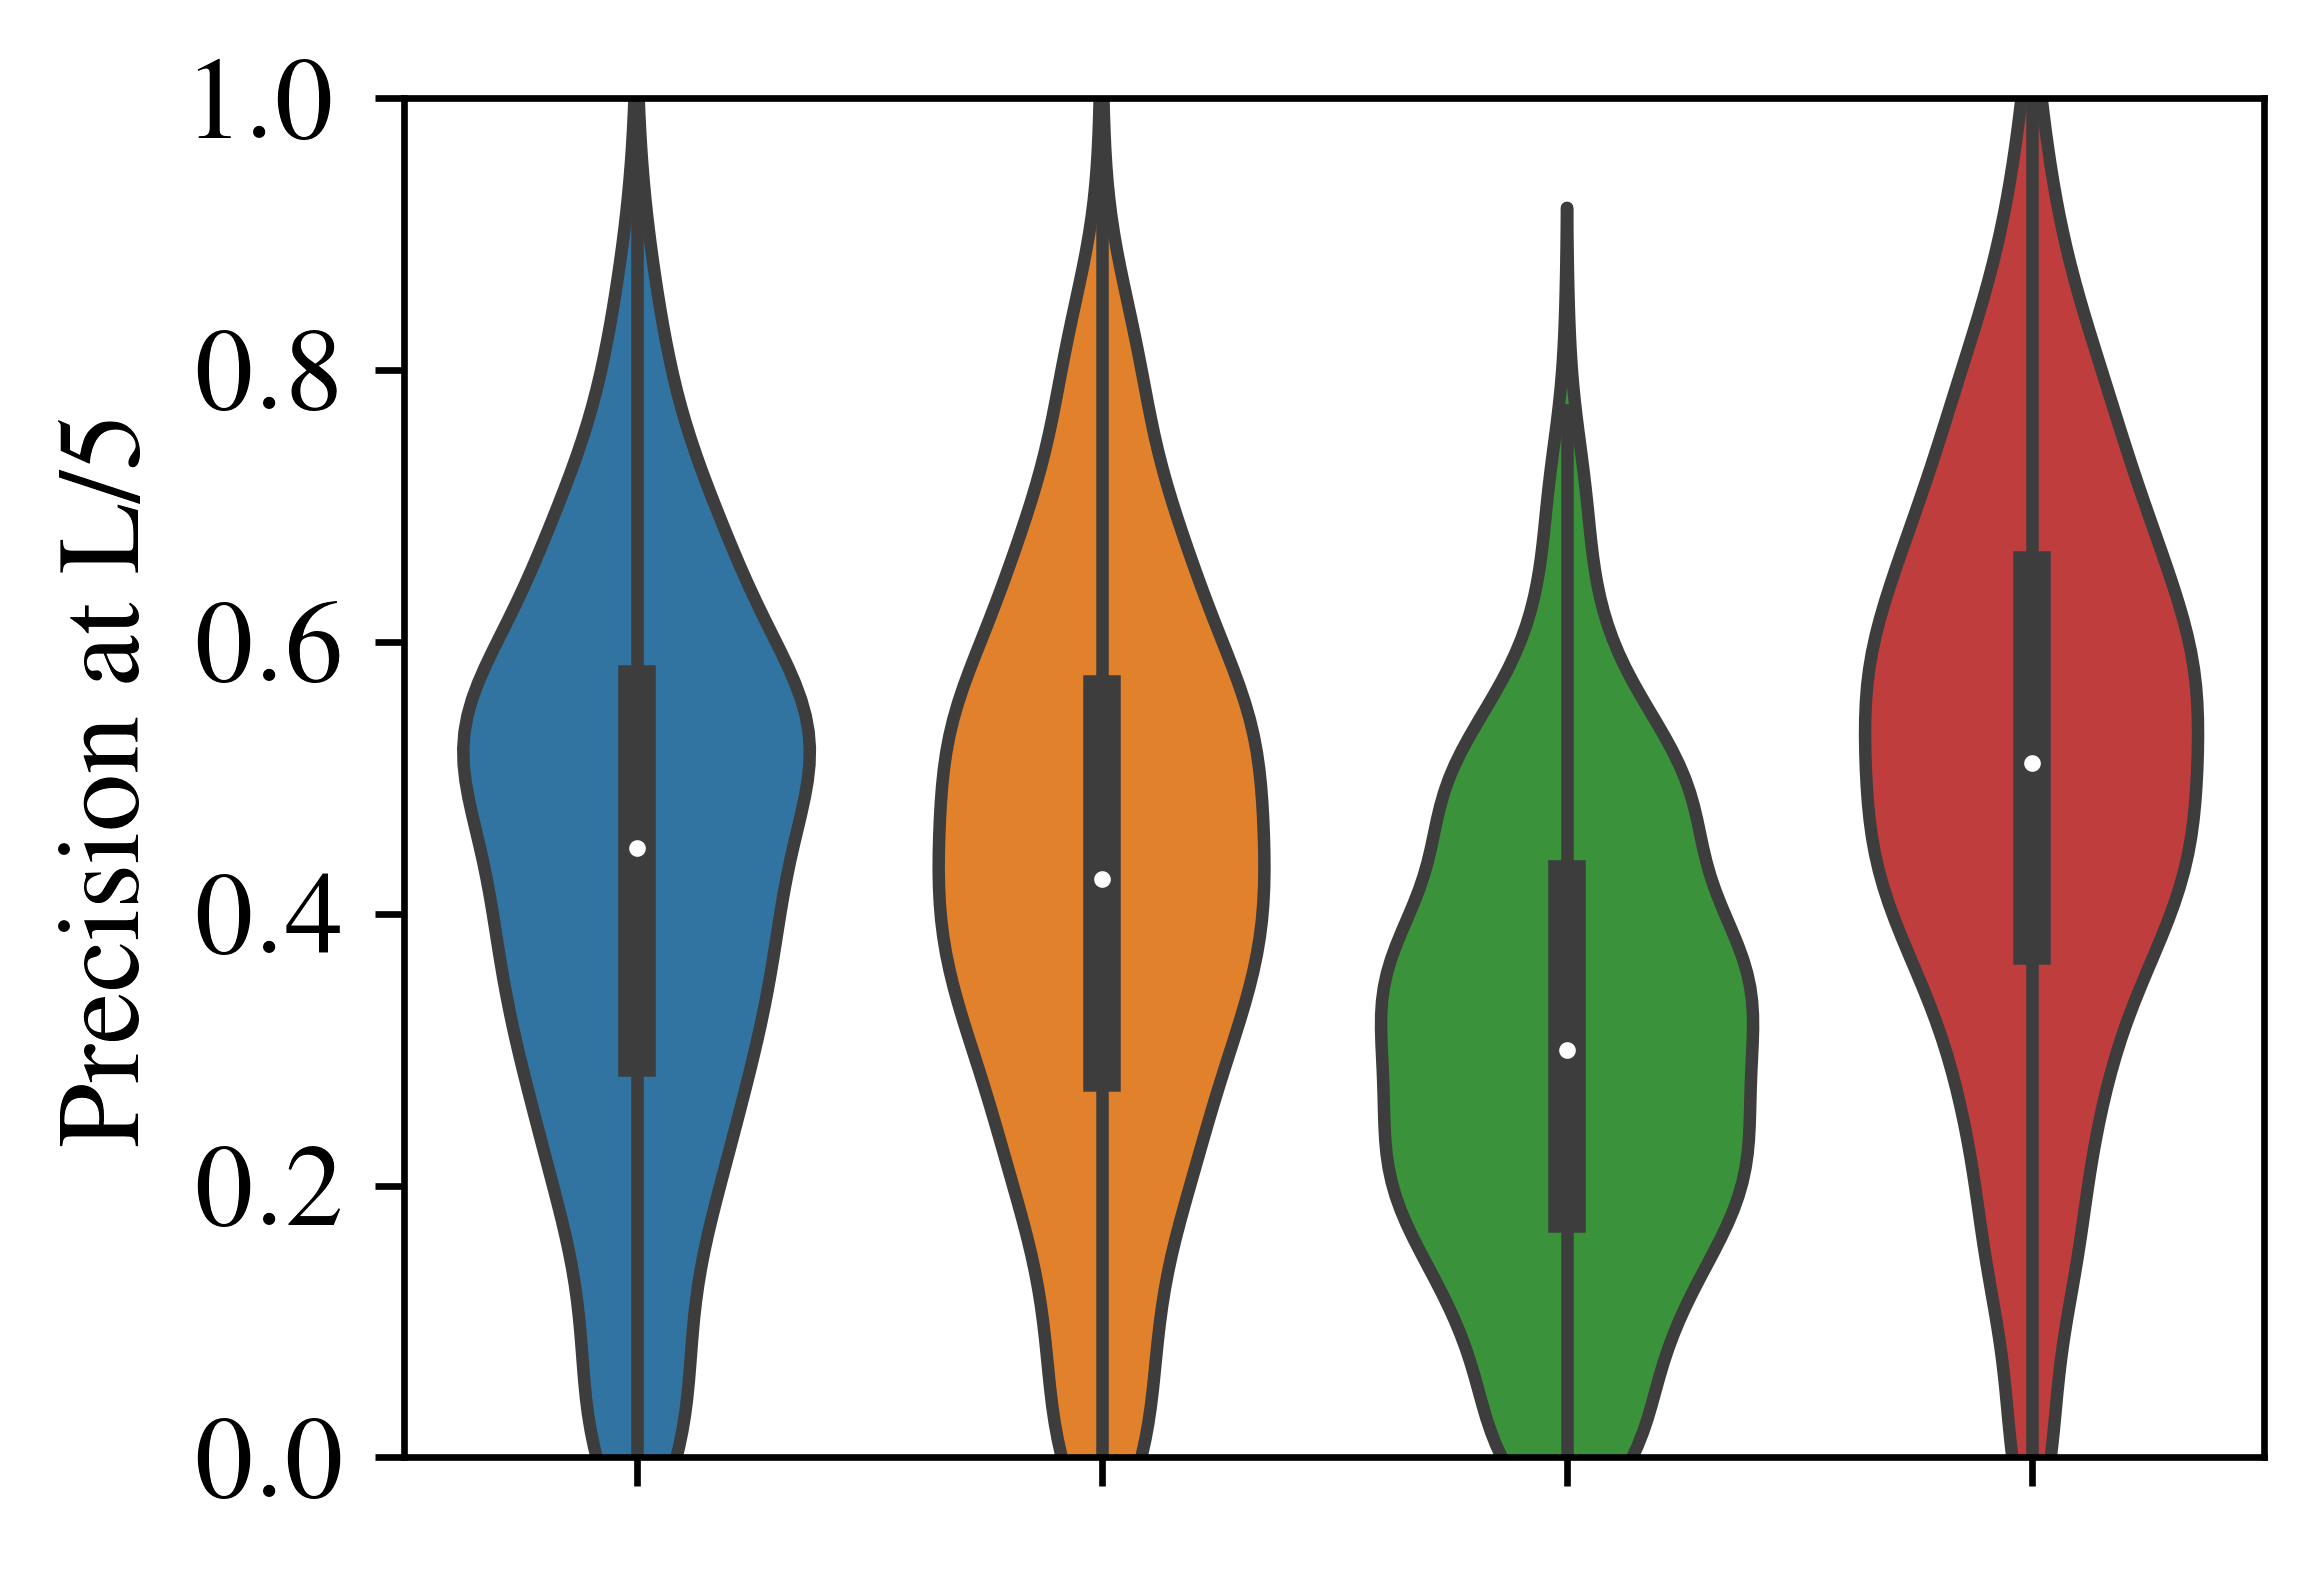

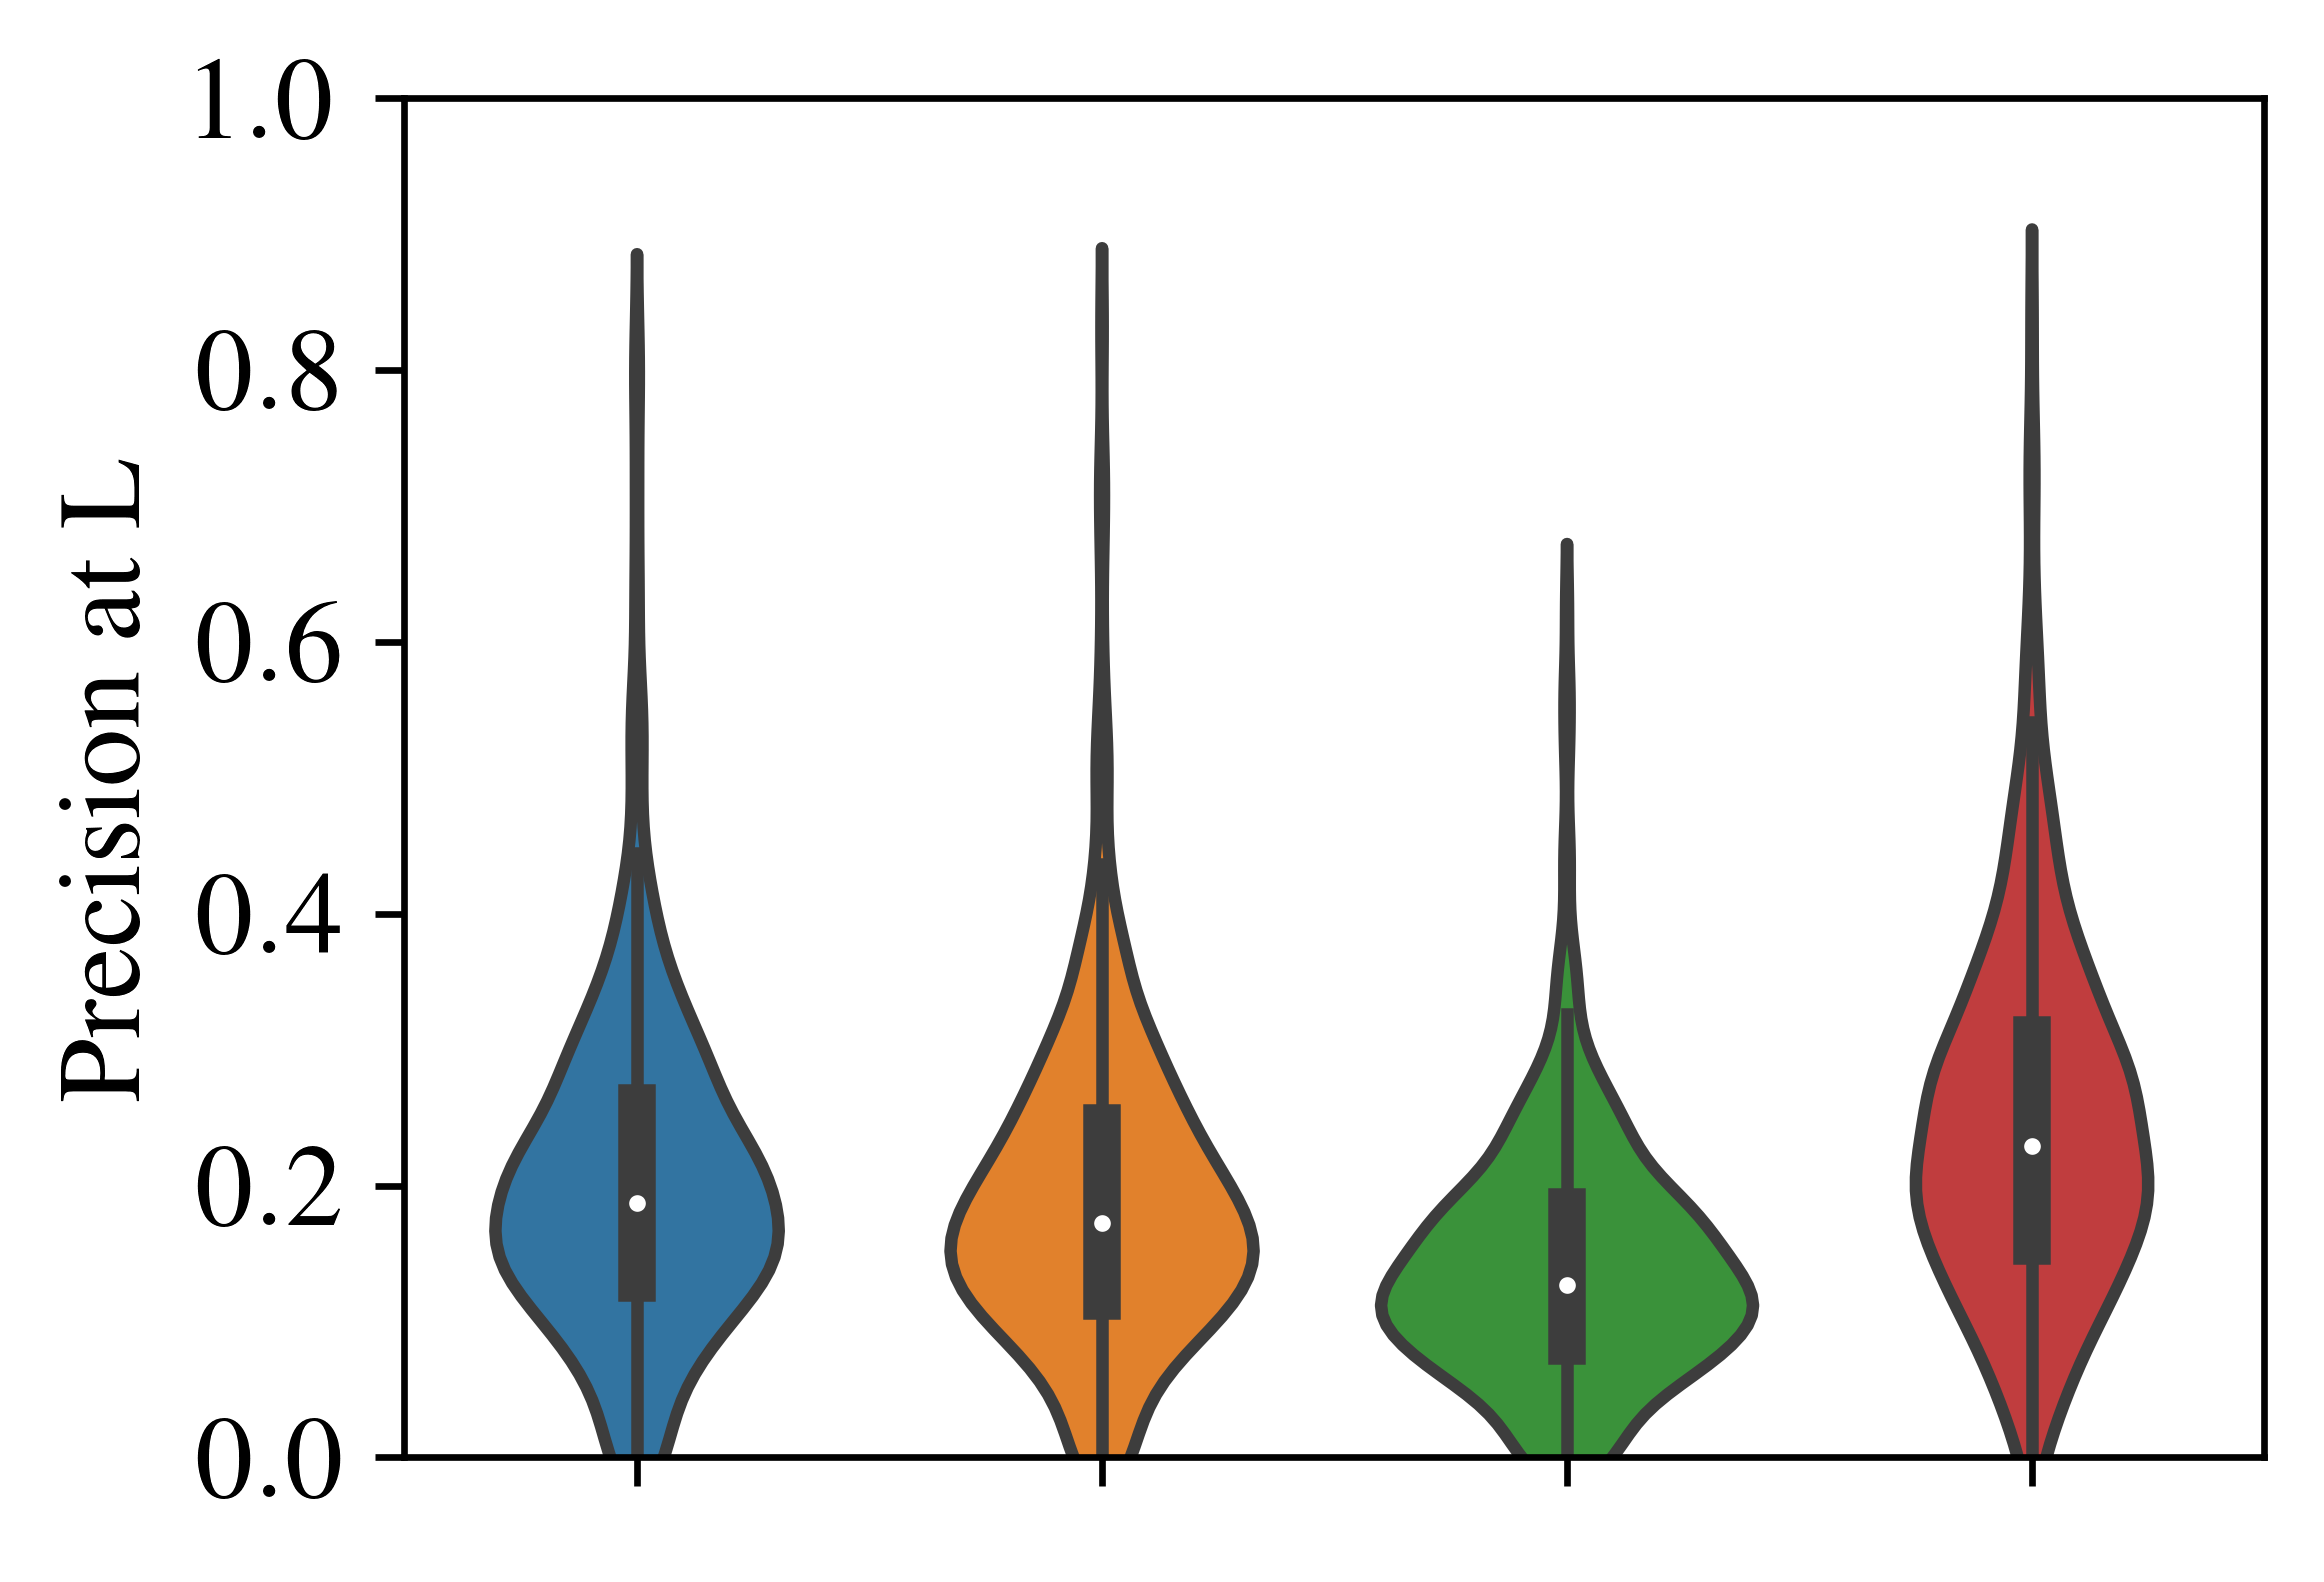

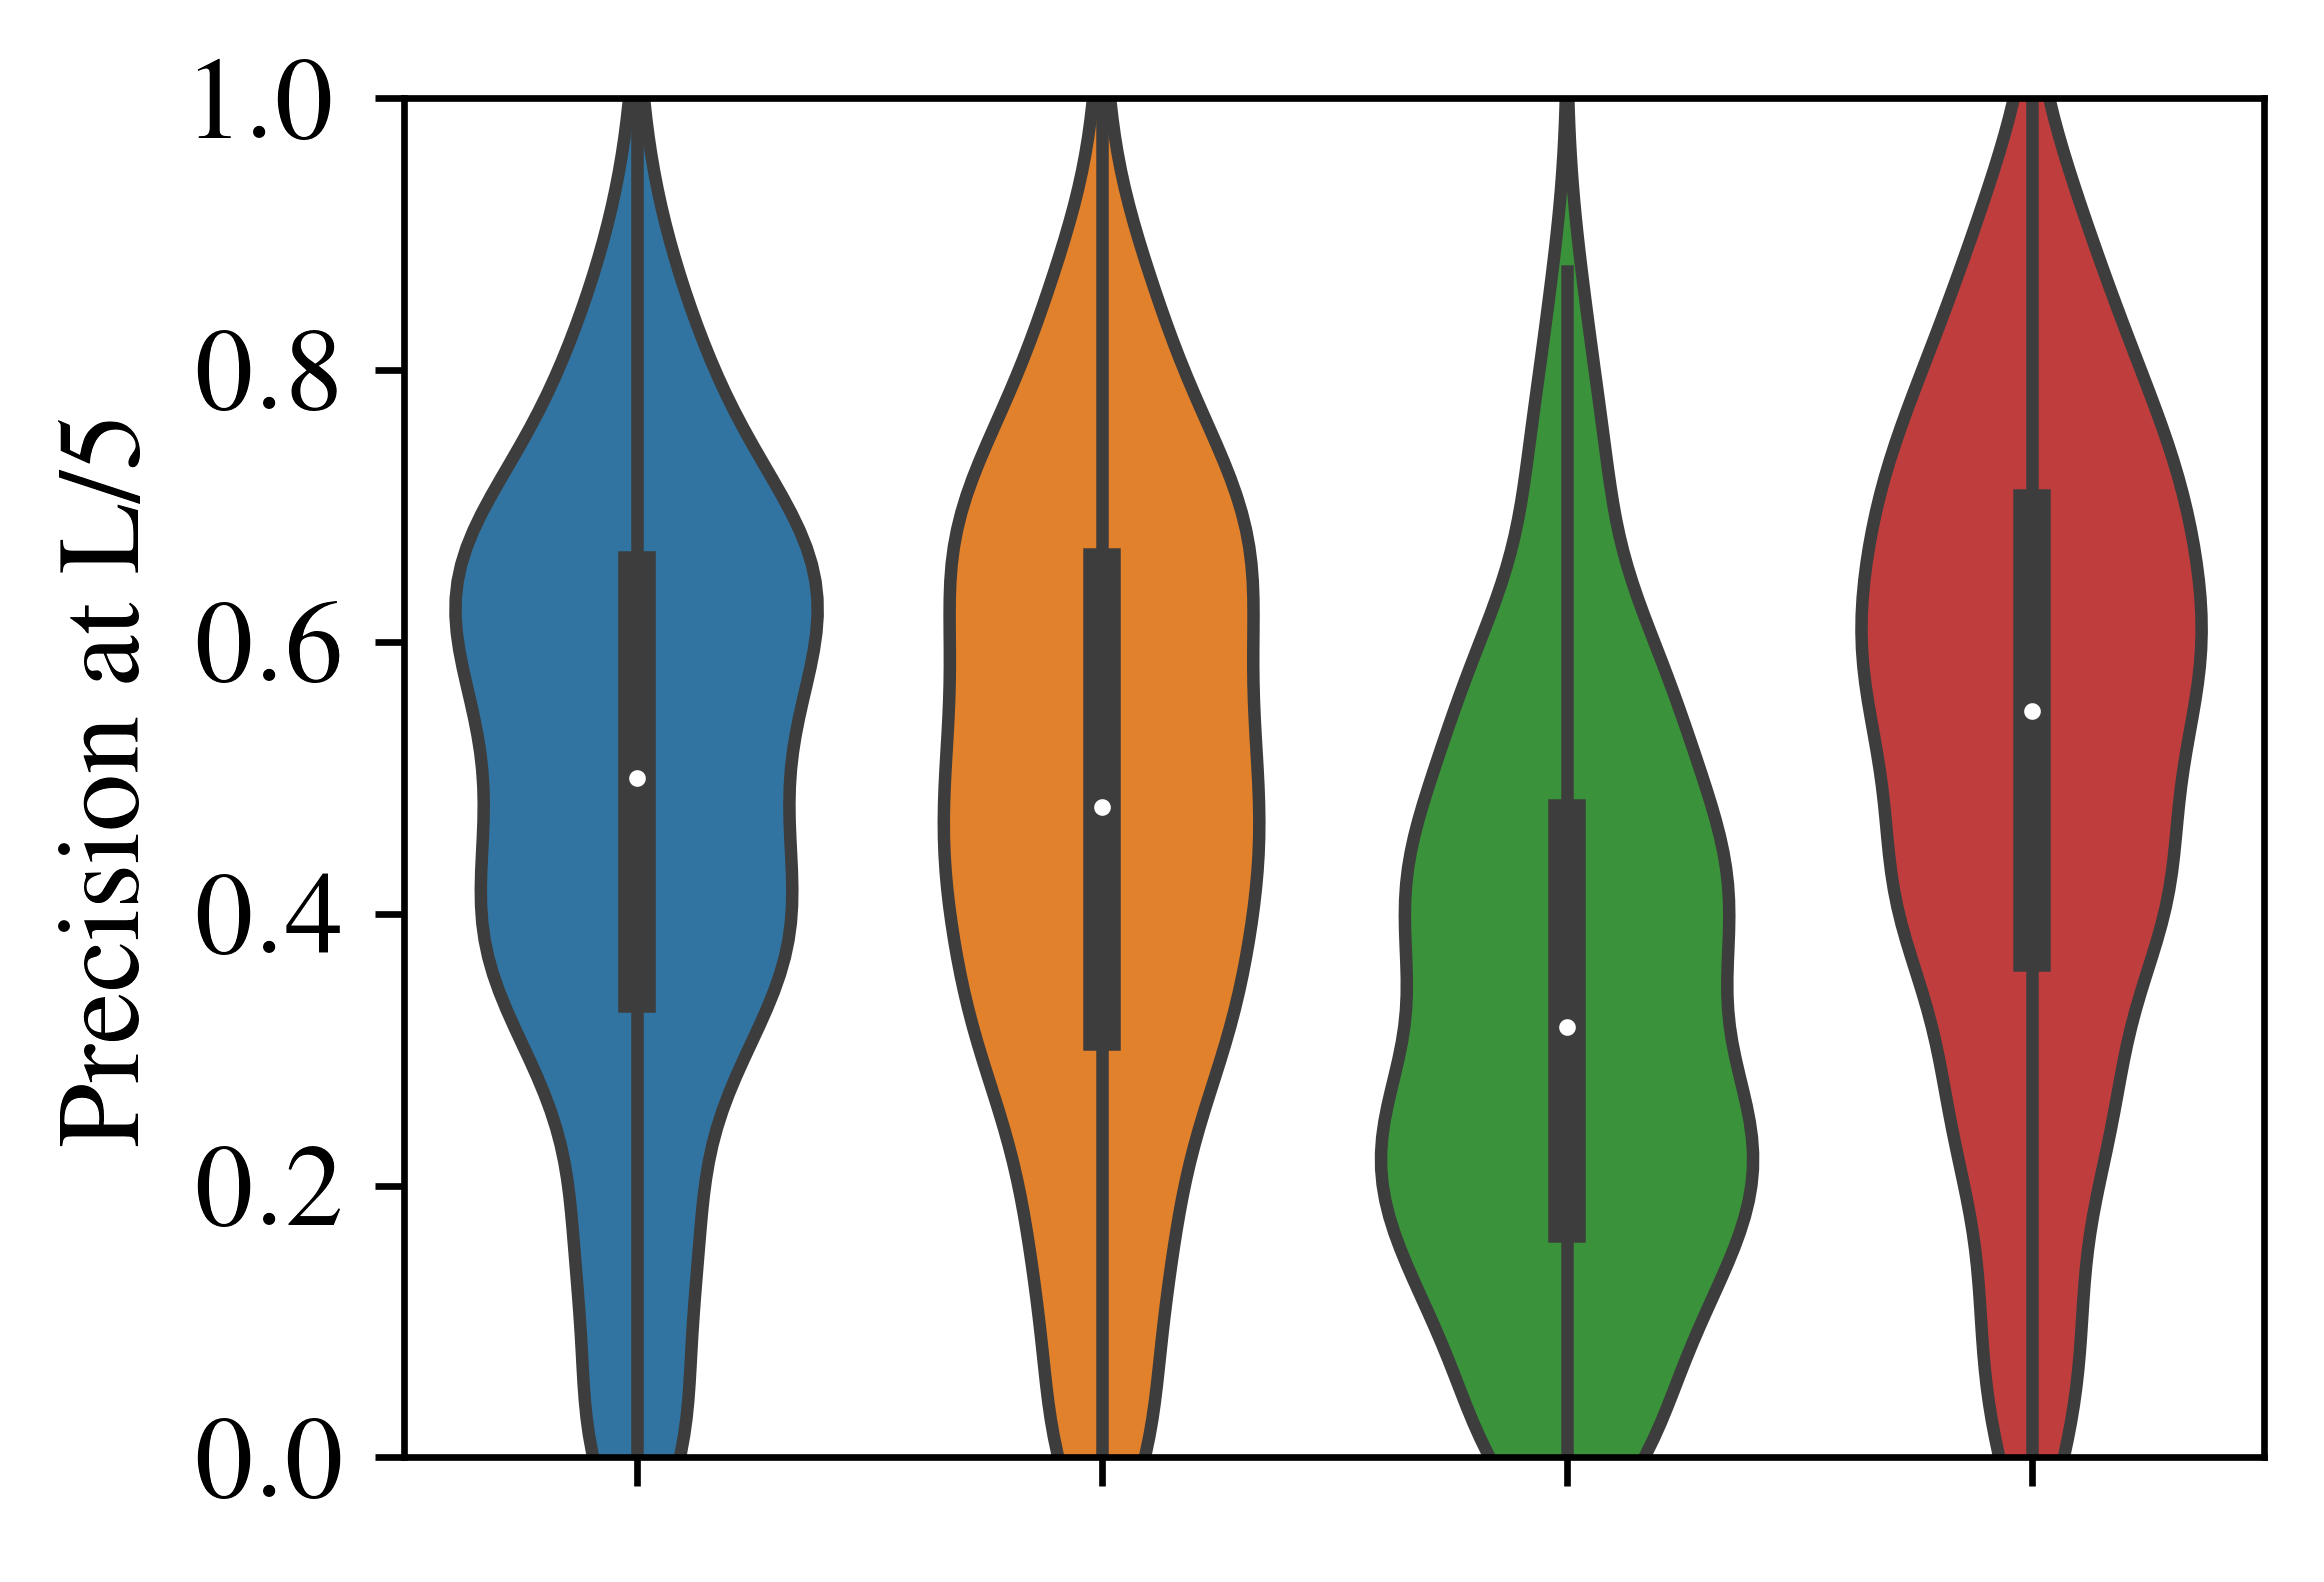

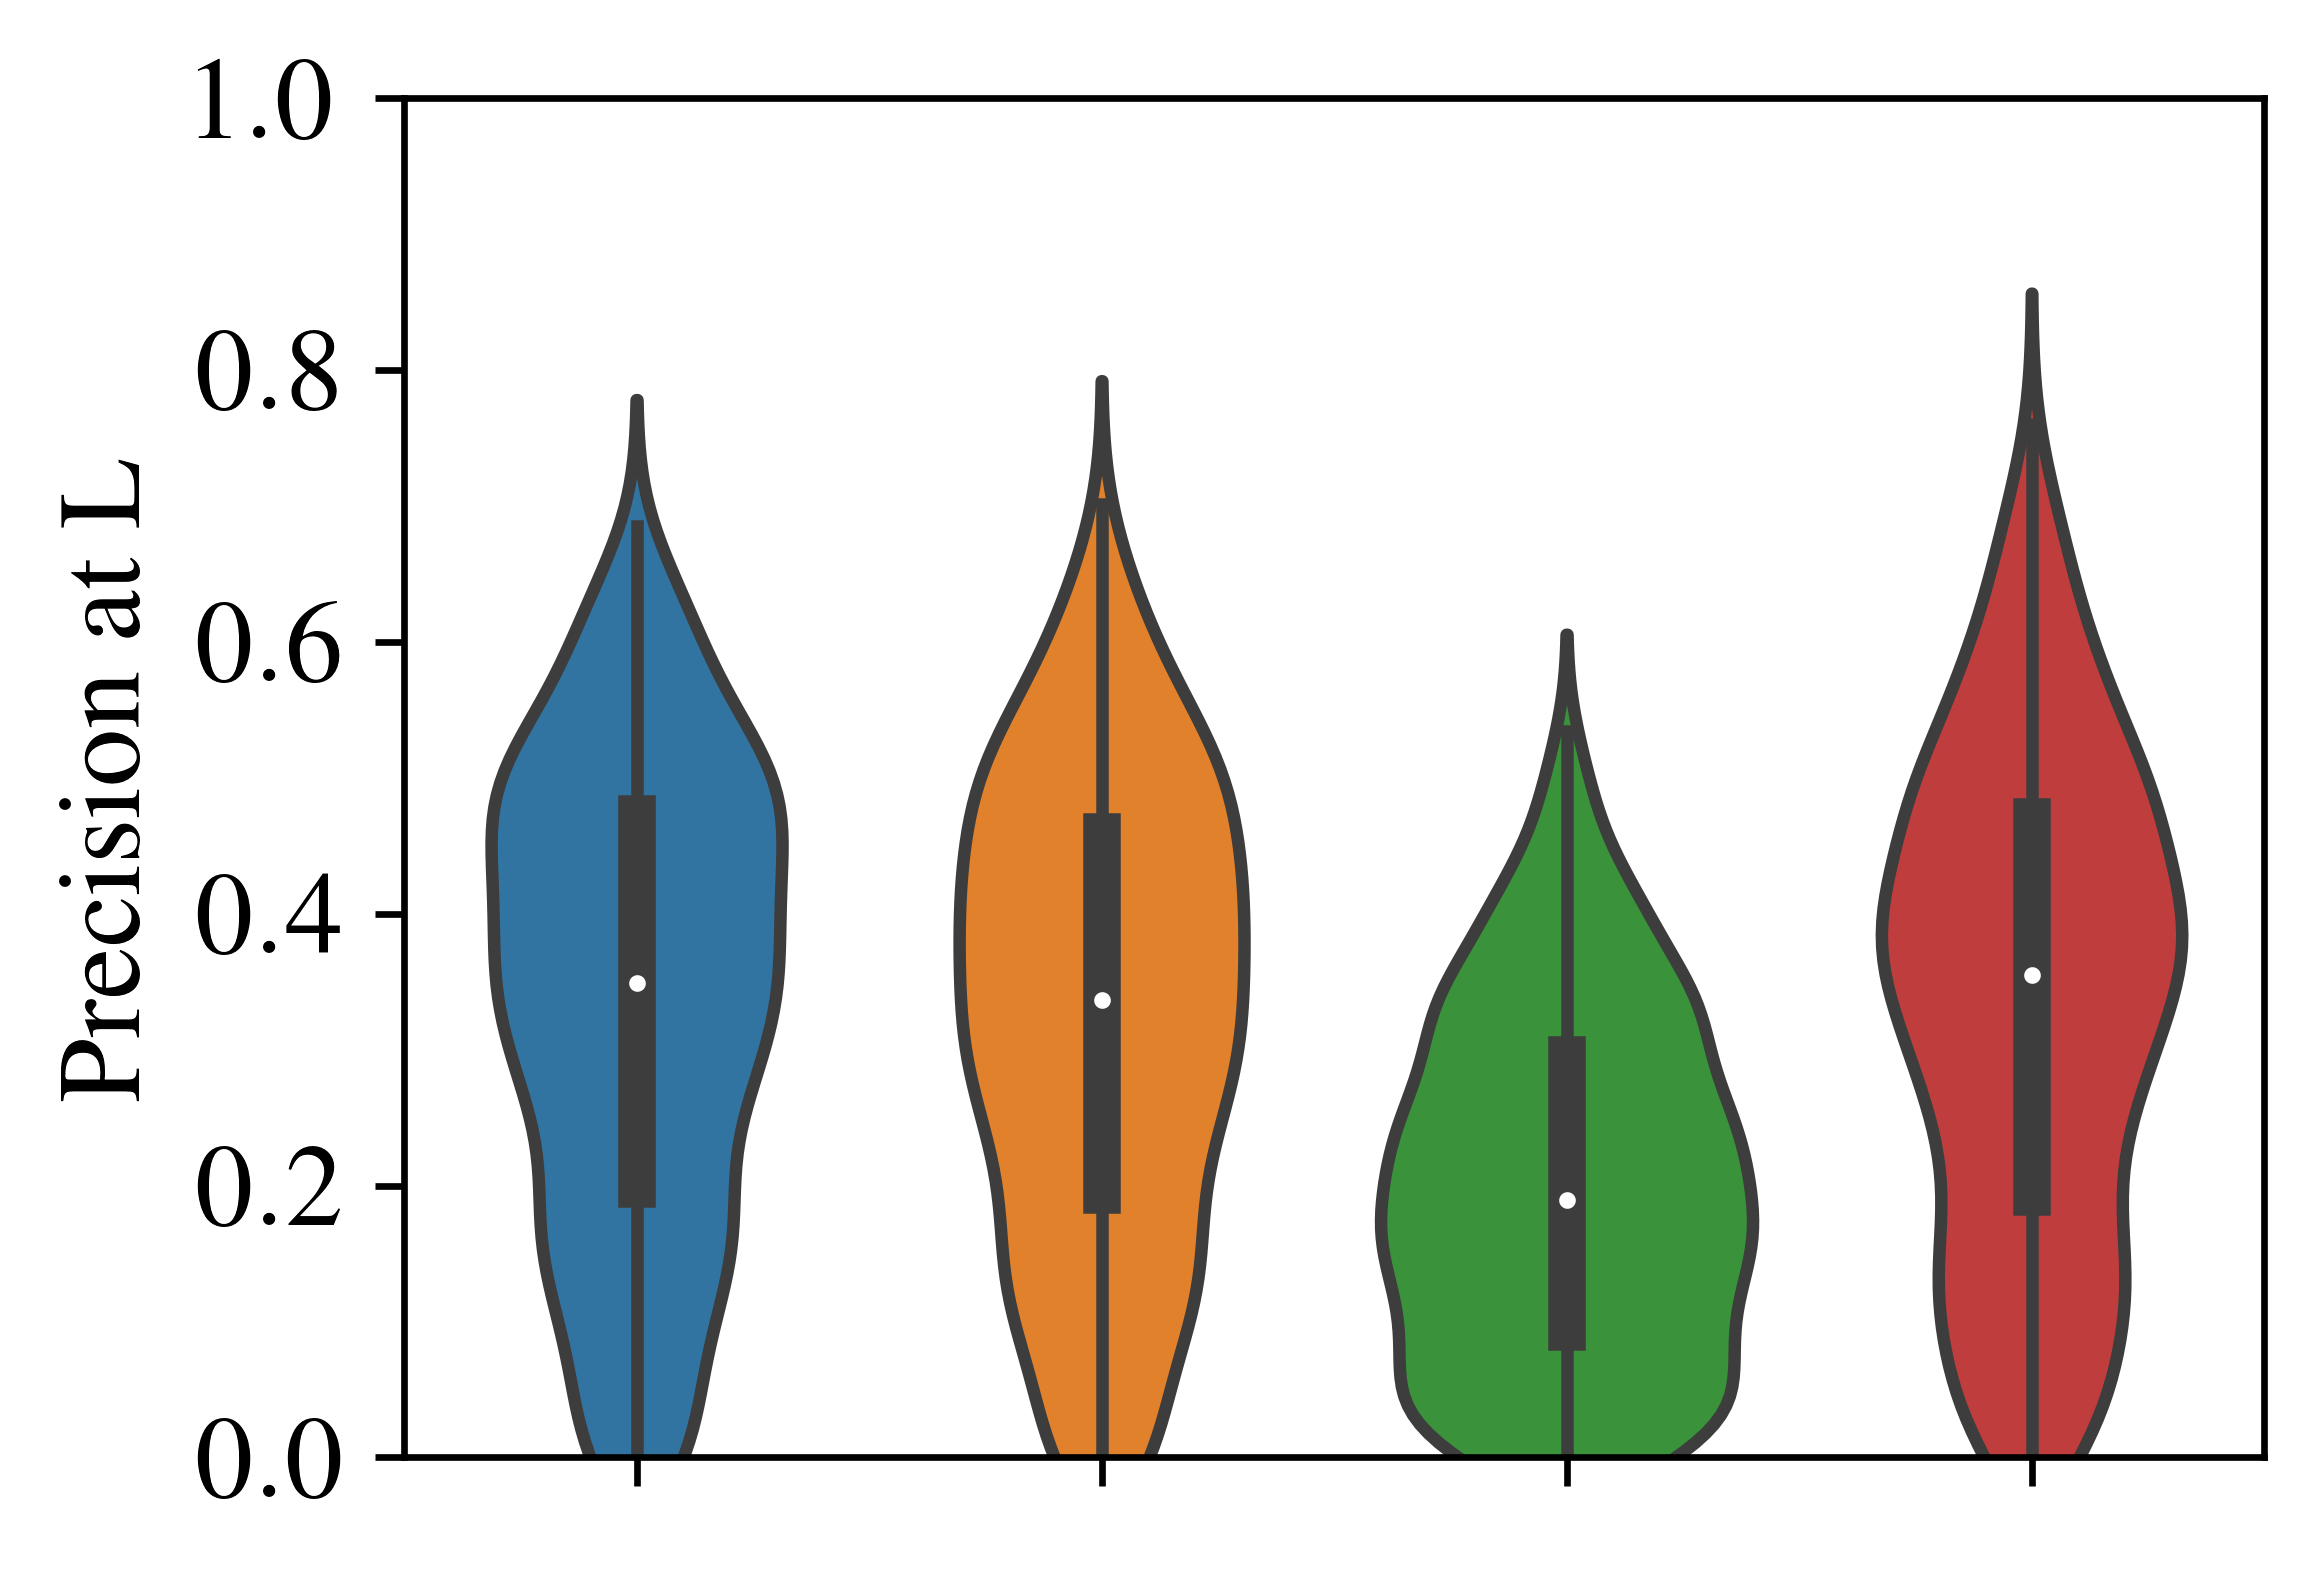

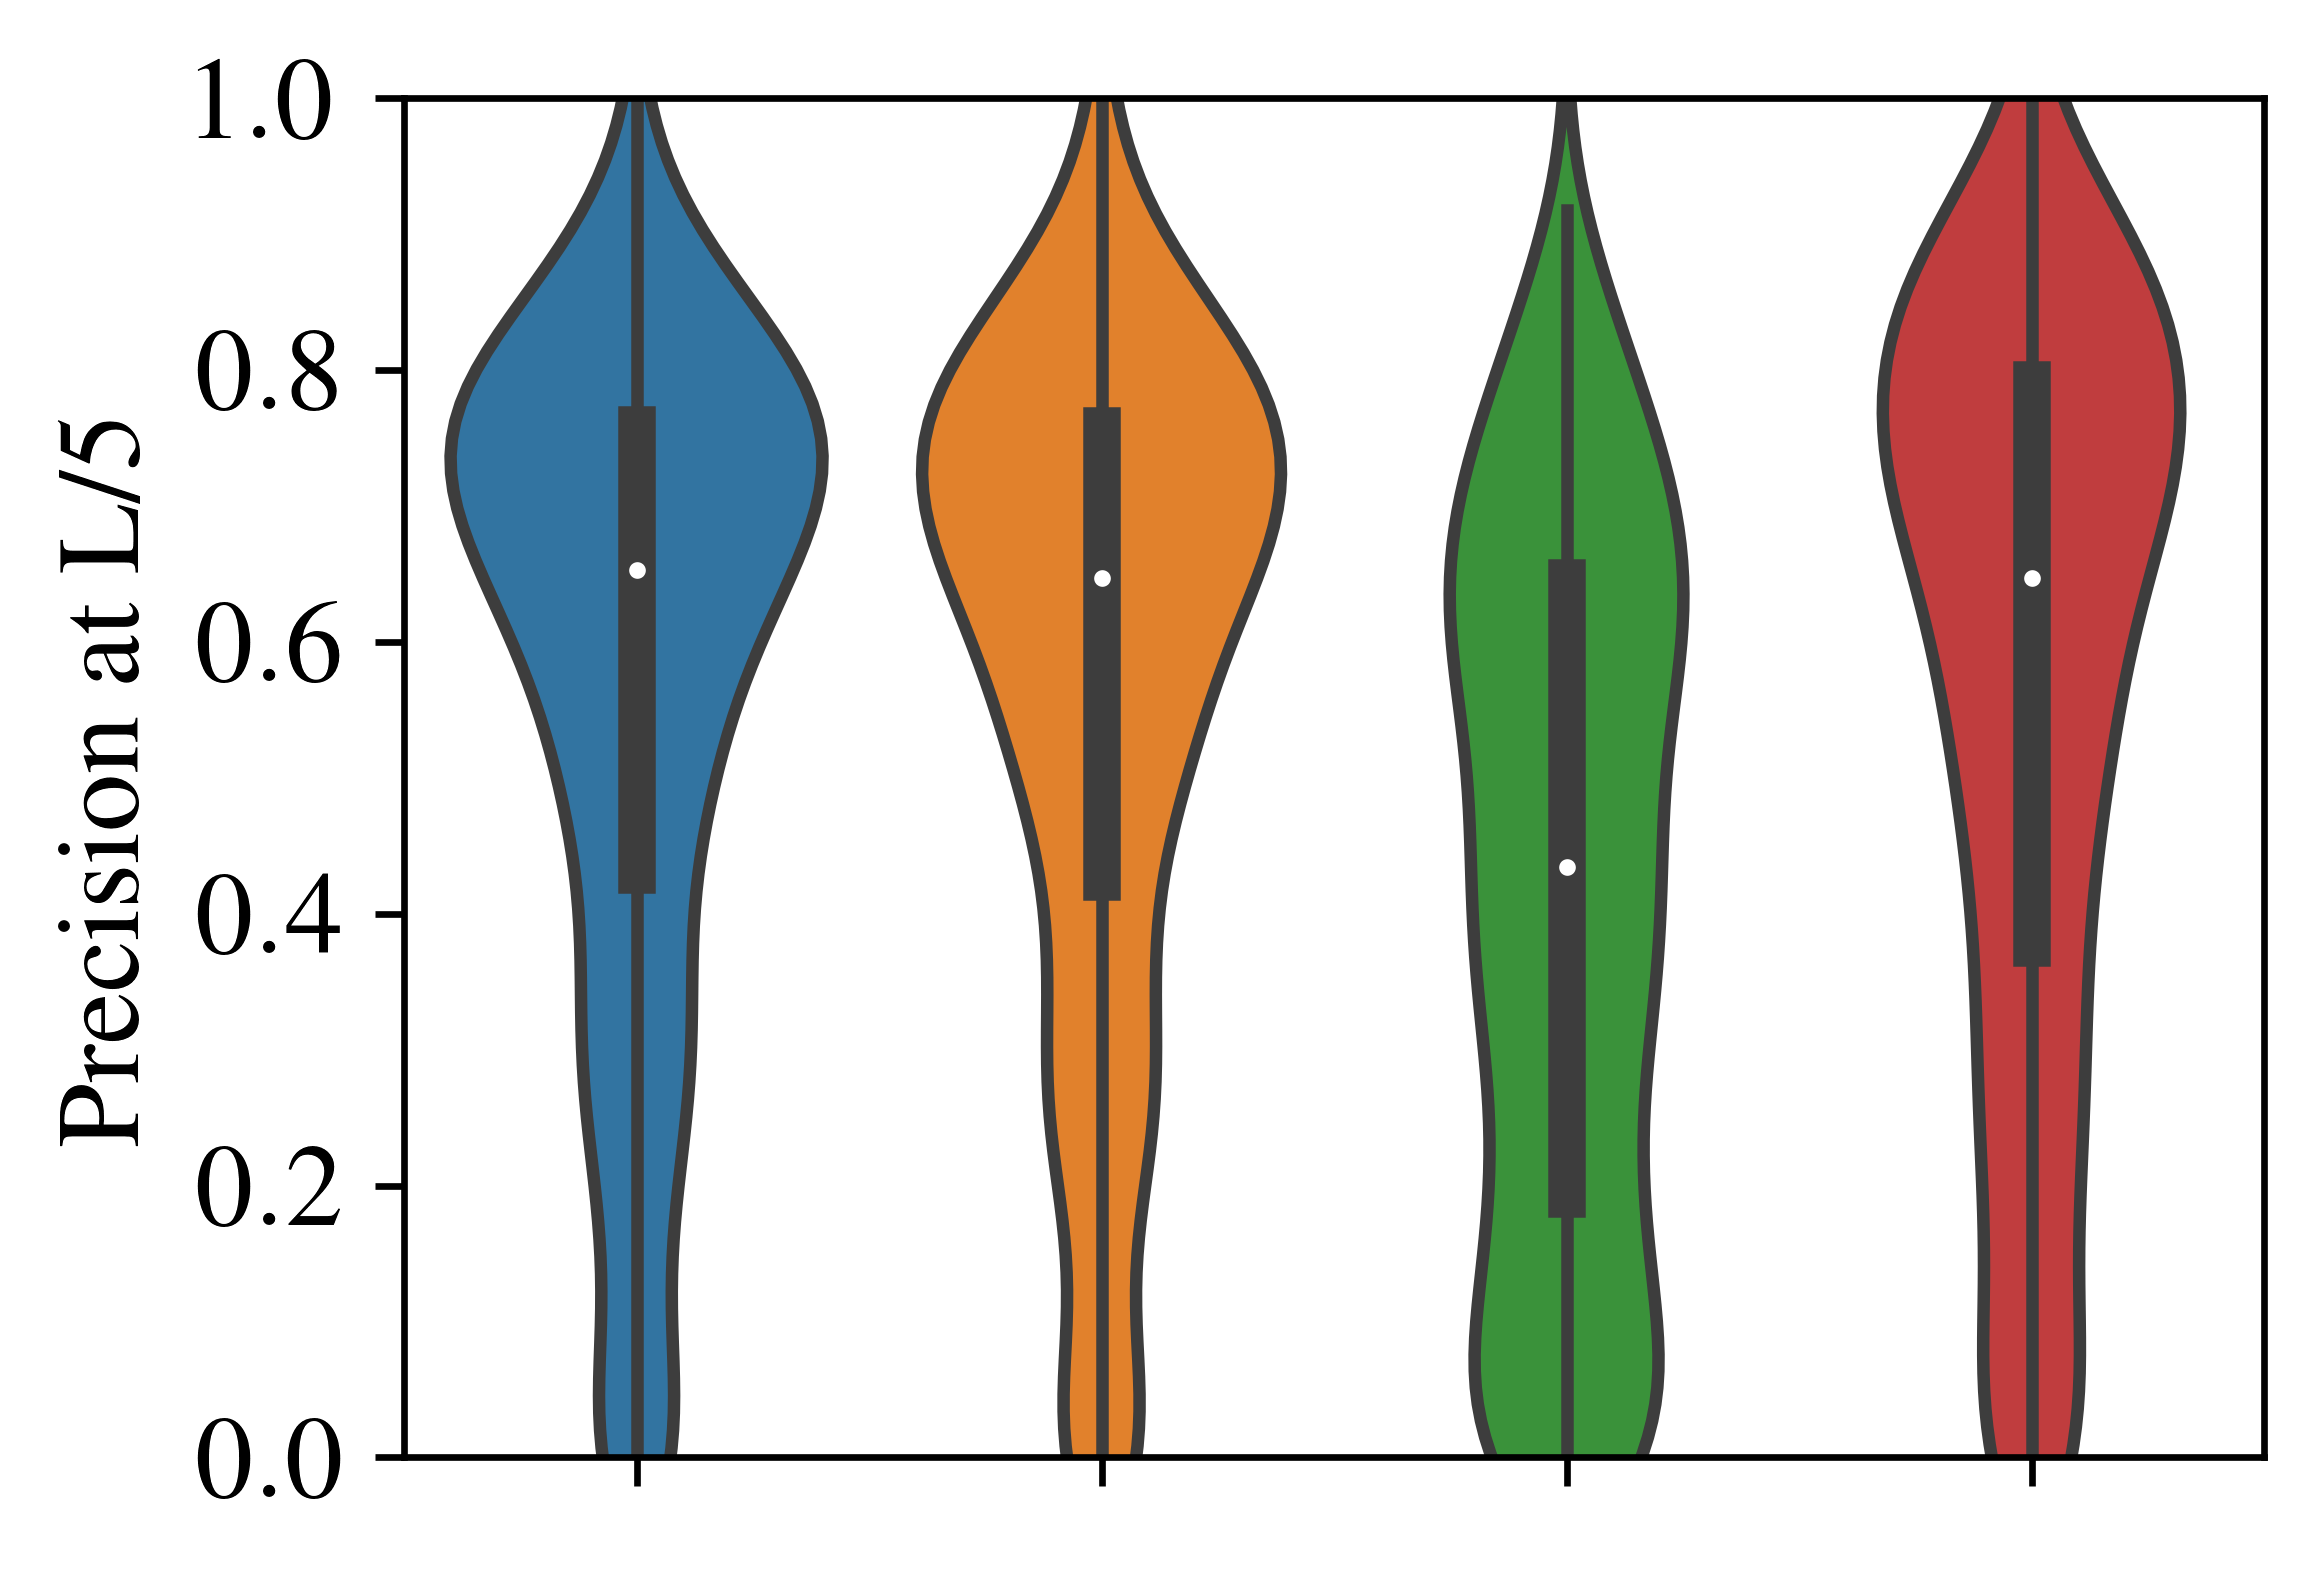

In [266]:
for category in ['short', 'medium', 'long']:
    for cutoff in ['l', 'l_5']:
        plt.figure(figsize=(4, 3), dpi=600)
        g = sns.violinplot(data=full_df, x='model', y=f'{category}_pr_at_{cutoff}')
        g.set_xticklabels(['', '', '', ''])

        plt.ylim(0, 1)
        plt.xlabel('')
        
#         if category == 'short':
        if cutoff == 'l_5':
            g.set_ylabel('Precision at L/5')
        else:
            g.set_ylabel('Precision at L')
#         else:
#             g.set_ylabel('')
#             g.set_yticklabels(['']*6)
        plt.savefig(f'stratified_{category}_precision_at_{cutoff}.pdf', dpi=600, bbox_inches="tight")


In [ ]:
plt.figure(dpi=600)
g = sns.violinplot(data=full_df, x='model', y='_pr_at_l_5')
g.set_xticklabels(['', '', '', ''])

plt.ylim(0, 1)
plt.xlabel('')
# new_labels = ['Potts', 'Factored Attn', 'Single-Layer Attn', 'ProtBERT-BFD']
# for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.ylabel('Precision at L/5')
plt.savefig('stratified_medium_precision_at_l_5.pdf', dpi=600)

<Figure size 3600x1200 with 0 Axes>

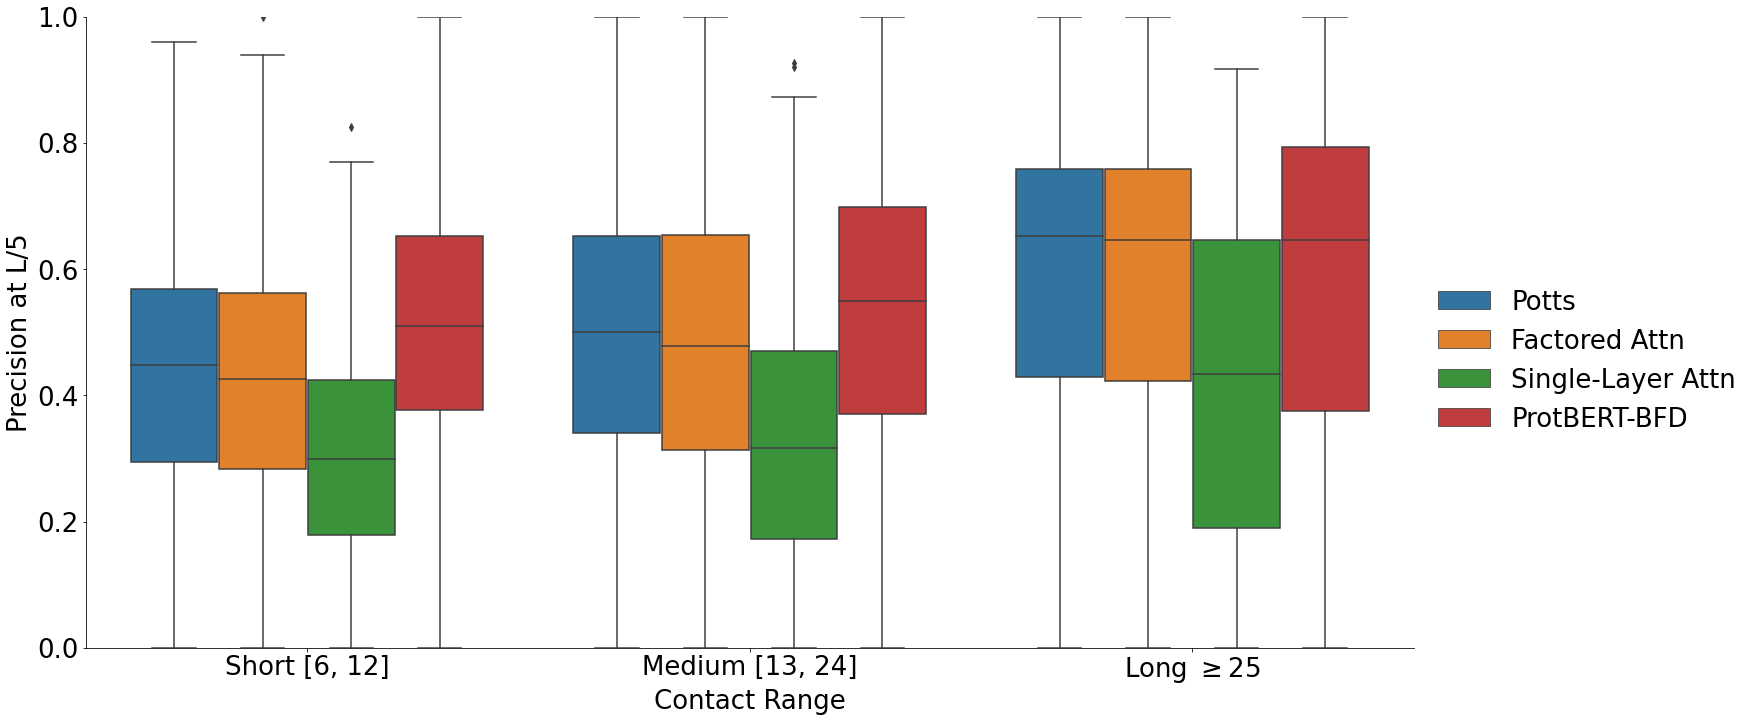

In [181]:
plt.figure(figsize = (6, 6/3), dpi=600)
melted_df = pd.melt(full_df, id_vars=['model'], value_vars=['short_pr_at_l_5', 'medium_pr_at_l_5', 'long_pr_at_l_5'])
# plt.subplots(dpi=600)
g = sns.catplot(x="variable", 
                y="value", 
                hue="model",
                data=melted_df, 
                kind="box",
                height=10, 
                aspect=2)
# plt.title('Stratified Precision at L/5')
g._legend.set_title('')
g.set_xticklabels(['Short [6, 12]', 'Medium [13, 24]', r'Long $\geq 25$'])
plt.ylabel('Precision at L/5')
plt.xlabel('Contact Range')

new_labels = ['Potts', 'Factored Attn', 'Single-Layer Attn', 'ProtBERT-BFD']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.ylim([0, 1])
plt.savefig('stratified_precision_p_at_l_5.pdf', dpi=600, bbox_inches="tight")

<Figure size 3600x1200 with 0 Axes>

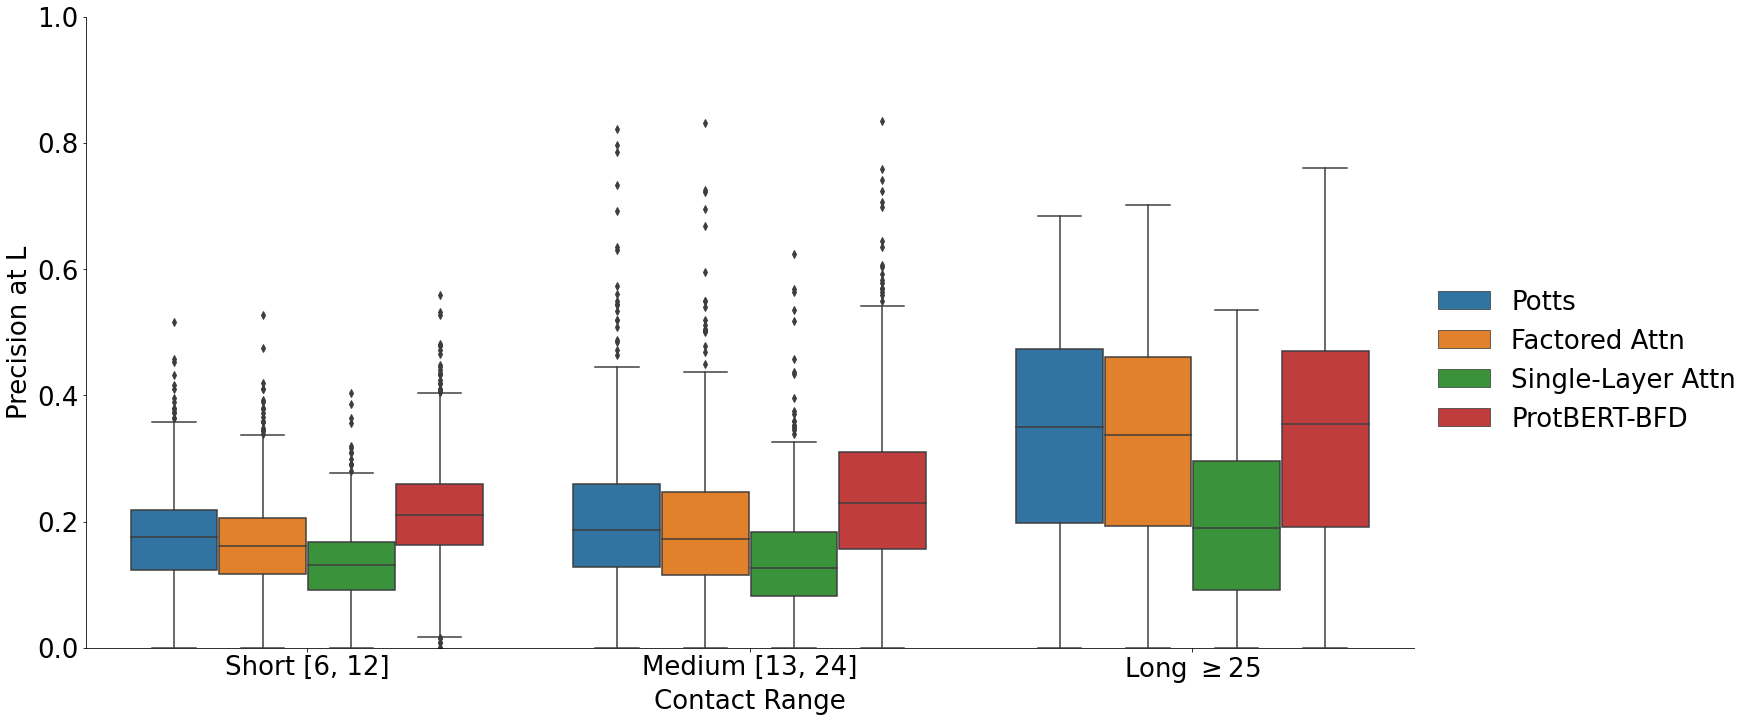

In [182]:
plt.figure(figsize = (6, 6/3), dpi=600)
melted_df = pd.melt(full_df, id_vars=['model'], value_vars=['short_pr_at_l', 'medium_pr_at_l', 'long_pr_at_l'])

# plt.subplots(dpi=600)
g = sns.catplot(x="variable", 
                y="value", 
                hue="model",
                data=melted_df, 
                kind="box",
                height=10, 
                aspect=2)
# plt.title('Stratified Precision at L')
g._legend.set_title('')
g.set_xticklabels(['Short [6, 12]', 'Medium [13, 24]', r'Long $\geq 25$'])
plt.ylabel('Precision at L')
plt.xlabel('Contact Range')

new_labels = ['Potts', 'Factored Attn', 'Single-Layer Attn', 'ProtBERT-BFD']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.ylim([0, 1])
plt.savefig('stratified_precision_p_at_l_5.pdf', dpi=600, bbox_inches="tight")

In [159]:
for metric in ['short_pr_at_l', 'medium_pr_at_l', 'long_pr_at_l']:
    print('----')
    for model in ['gremlin', 'factored_attention', 'transformer', 'protbert_bfd']:
        print(model, metric, full_df[full_df['model'] == model][metric].median(), sep='\t')

----
gremlin	short_pr_at_l	0.17573221027851105
factored_attention	short_pr_at_l	0.16139240562915802
transformer	short_pr_at_l	0.13108614087104797
protbert_bfd	short_pr_at_l	0.21078431606292725
----
gremlin	medium_pr_at_l	0.1871345043182373
factored_attention	medium_pr_at_l	0.1726190447807312
transformer	medium_pr_at_l	0.1267605572938919
protbert_bfd	medium_pr_at_l	0.22921913862228394
----
gremlin	long_pr_at_l	0.34933775663375854
factored_attention	long_pr_at_l	0.33673468232154846
transformer	long_pr_at_l	0.18978102505207062
protbert_bfd	long_pr_at_l	0.35474005341529846


In [160]:
for metric in ['short_pr_at_l_5', 'medium_pr_at_l_5', 'long_pr_at_l_5']:
    print('----')
    for model in ['gremlin', 'factored_attention', 'transformer', 'protbert_bfd']:
        print(model, metric, full_df[full_df['model'] == model][metric].median(), sep='\t')

----
gremlin	short_pr_at_l_5	0.4482758641242981
factored_attention	short_pr_at_l_5	0.42553192377090454
transformer	short_pr_at_l_5	0.30000001192092896
protbert_bfd	short_pr_at_l_5	0.5106382966041565
----
gremlin	medium_pr_at_l_5	0.5
factored_attention	medium_pr_at_l_5	0.47826087474823
transformer	medium_pr_at_l_5	0.31707316637039185
protbert_bfd	medium_pr_at_l_5	0.5492957830429077
----
gremlin	long_pr_at_l_5	0.6530612111091614
factored_attention	long_pr_at_l_5	0.6470588445663452
transformer	long_pr_at_l_5	0.43478259444236755
protbert_bfd	long_pr_at_l_5	0.6470588445663452


In [269]:
full_df[full_df['model'] == 'protbert_bfd']['short_pr_at_l_5'].median() - full_df[full_df['model'] == 'gremlin']['short_pr_at_l_5'].median() 

0.0623624324798584

In [272]:
pbfd_vs_gremlin_df = full_df[full_df['model'] == 'protbert_bfd'].merge(full_df[full_df['model'] == 'gremlin'], on='pdb')
(pbfd_vs_gremlin_df['short_pr_at_l_5_x'] - pbfd_vs_gremlin_df['short_pr_at_l_5_y']).median()

0.06366091966629028

In [274]:
dif_med = full_df[full_df['model'] == 'protbert_bfd']['long_pr_at_l_5'].median() - full_df[full_df['model'] == 'gremlin']['long_pr_at_l_5'].median() 

pbfd_vs_gremlin_df = full_df[full_df['model'] == 'protbert_bfd'].merge(full_df[full_df['model'] == 'gremlin'], on='pdb')
med_dif = (pbfd_vs_gremlin_df['long_pr_at_l_5_x'] - pbfd_vs_gremlin_df['long_pr_at_l_5_y']).median()
print(dif_med)
print(med_dif)

-0.006002366542816162
0.0


In [276]:
pbfd_vs_gremlin_df['long_pr_at_l_5_x'] - pbfd_vs_gremlin_df['long_pr_at_l_5_y']

0      0.250000
1      0.095238
2      0.000000
3     -0.161290
4     -0.157895
         ...   
665    0.093750
666    0.096774
667   -0.043478
668    0.214286
669    0.360000
Length: 670, dtype: float64

In [83]:
np.median(full_df[full_df['model'] == 'factored_attention']['long_pr_at_l_5'])

0.6470588445663452

In [89]:
np.median(full_df[full_df['model'] == 'protbert_bfd']['long_pr_at_l_5'][:-10])

0.6470588445663452

In [80]:
import numpy as np

In [97]:
full_df[full_df['model'] == 'protbert_bfd'][:-10][['pdb', 'long_pr_at_l_5', 'short_pr_at_l_5']]

,pdb,long_pr_at_l_5,short_pr_at_l_5
0,2w3o_1_A,0.750000,0.850000
1,1eqz_1_B,0.285714,0.142857
2,3no0_1_A,0.909091,0.654545
3,1xju_1_A,0.483871,0.354839
4,4ew5_1_B,0.000000,0.315789
...,...,...,...
708,3bm4_1_A,0.641026,0.743590
709,2exe_1_A,0.461538,0.384615
710,4ckm_1_B,0.000000,0.259259
711,2j7a_1_F,0.103448,0.172414


In [101]:
full_df[full_df['model'] == 'factored_attention'][:-10][['pdb', 'pdb_idx','long_pr_at_l_5', 'short_pr_at_l_5']]

,pdb,pdb_idx,long_pr_at_l_5,short_pr_at_l_5
746,2w3o_1_A,NaN,0.500000,0.800000
747,1eqz_1_B,NaN,0.190476,0.142857
748,3no0_1_A,NaN,0.909091,0.545455
749,1xju_1_A,NaN,0.612903,0.354839
750,4ew5_1_B,NaN,0.263158,0.368421
...,...,...,...,...
1474,4cij_1_B,NaN,0.433962,0.283019
1475,4x4w_1_B,NaN,0.683544,0.594937
1476,3eud_1_A,NaN,0.684211,0.684211
1477,2j7a_1_F,NaN,0.172414,0.310345


In [117]:
fatt_metatest_df = fatt_df[fatt_df['num_attention_heads'] == 256]
fatt_metatest_df.sort_values(by='pdb')

,pdb,msa_length,num_seqs,attention_head_size,num_attention_heads,short_auc,short_pr_at_l,short_pr_at_l_2,short_pr_at_l_5,short_pr_at_l_10,...,w_pearson,msa_length_y,num_seqs_y,attention_head_size_y,long_auc,long_pr_at_l,long_pr_at_l_2,long_pr_at_l_5,long_pr_at_l_10,model
1142,1a62_1_A,125,2641,32,256,0.247485,0.152000,0.193548,0.360000,0.583333,...,0.649842,125,2641,32,0.365333,0.240000,0.306452,0.560000,0.666667,factored_attention
1106,1b4u_1_A,132,2165,32,256,0.366432,0.181818,0.287879,0.692308,0.769231,...,0.679646,132,2165,32,0.313858,0.181818,0.272727,0.461538,0.615385,factored_attention
1136,1b82_1_A,349,3080,32,256,0.179987,0.134670,0.172414,0.217391,0.294118,...,0.557041,349,3080,32,0.389881,0.280802,0.385057,0.492754,0.588235,factored_attention
1174,1bxw_1_A,150,11964,32,256,0.567942,0.360000,0.546667,0.800000,1.000000,...,0.491189,150,11964,32,0.556074,0.386667,0.533333,0.700000,0.800000,factored_attention
1264,1ca9_1_A,191,5115,32,256,0.226553,0.120419,0.178947,0.342105,0.578947,...,0.528861,191,5115,32,0.533562,0.371728,0.515789,0.736842,0.684211,factored_attention
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,6b57_1_A,201,2222,32,256,0.338771,0.184080,0.270000,0.500000,0.800000,...,0.603729,201,2222,32,0.490805,0.318408,0.470000,0.750000,0.750000,factored_attention
896,6bxg_1_A,98,16811,32,256,0.497779,0.336735,0.469388,0.736842,0.777778,...,0.522771,98,16811,32,0.773902,0.612245,0.795918,0.894737,0.888889,factored_attention
1297,6c5c_1_B,383,9133,32,256,0.277864,0.156658,0.251309,0.407895,0.631579,...,0.442052,383,9133,32,0.696279,0.579634,0.701571,0.802632,0.763158,factored_attention
1108,6cw0_1_B,103,4759,32,256,0.260331,0.106796,0.196078,0.400000,0.800000,...,0.627260,103,4759,32,0.501721,0.320388,0.529412,0.750000,0.500000,factored_attention


In [116]:
pbfd_df.sort_values(by='pdb')

,sweep_name,pdb,pdb_idx,msa_length,num_seqs,run_state,pr_at_L,pr_at_L_apc,pr_at_L_5,pr_at_L_5_apc,...,medium_auc,medium_pr_at_l,medium_pr_at_l_2,medium_pr_at_l_5,medium_pr_at_l_10,long_auc,long_pr_at_l,long_pr_at_l_2,long_pr_at_l_5,long_pr_at_l_10
384,protbert_bfd,1a62_1_A,352,125.0,2641.0,finished,0.168000,0.200000,0.240000,0.240000,...,0.275355,0.192000,0.274194,0.400000,0.333333,0.167791,0.112000,0.161290,0.240000,0.250000
351,protbert_bfd,1b4u_1_A,387,132.0,2165.0,finished,0.204545,0.204545,0.253165,0.265823,...,0.151015,0.090909,0.136364,0.230769,0.307692,0.248280,0.143939,0.212121,0.384615,0.461538
379,protbert_bfd,1b82_1_A,357,349.0,3080.0,finished,0.191977,0.189112,0.234450,0.234450,...,0.184077,0.131805,0.178161,0.246377,0.323529,0.178523,0.123209,0.178161,0.217391,0.264706
415,protbert_bfd,1bxw_1_A,320,150.0,11964.0,finished,0.773333,0.786667,0.911111,0.922222,...,0.771026,0.593333,0.800000,0.966667,1.000000,0.644651,0.480000,0.613333,0.866667,0.866667
502,protbert_bfd,1ca9_1_A,226,191.0,5115.0,finished,0.324607,0.319372,0.429825,0.429825,...,0.342180,0.183246,0.294737,0.500000,0.789474,0.487476,0.319372,0.505263,0.605263,0.789474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,protbert_bfd,6b57_1_A,435,201.0,2222.0,finished,0.472637,0.462687,0.583333,0.600000,...,0.458123,0.278607,0.430000,0.650000,0.850000,0.319820,0.213930,0.330000,0.425000,0.450000
146,protbert_bfd,6bxg_1_A,597,98.0,16811.0,finished,0.632653,0.673469,0.741379,0.741379,...,0.637135,0.438776,0.612245,0.842105,1.000000,0.588721,0.387755,0.551020,0.842105,1.000000
534,protbert_bfd,6c5c_1_B,193,383.0,9133.0,finished,0.537859,0.537859,0.672489,0.676856,...,0.378264,0.206266,0.329843,0.578947,0.815789,0.609999,0.454308,0.602094,0.815789,0.842105
352,protbert_bfd,6cw0_1_B,385,103.0,4759.0,finished,0.436893,0.446602,0.524590,0.557377,...,0.393118,0.203883,0.352941,0.600000,0.800000,0.405718,0.320388,0.450980,0.550000,0.300000


In [119]:
merged_df = fatt_metatest_df.merge(pbfd_df, on='pdb')

In [131]:
merged_df.shape

(718, 56)

(array([  1.,   2.,   5.,   6.,  14.,  19.,  38.,  73., 125., 118., 114.,
         66.,  40.,  37.,  25.,  13.,   9.,   7.,   4.,   2.]),
 array([-0.78409091, -0.70342295, -0.62275499, -0.54208704, -0.46141908,
        -0.38075112, -0.30008316, -0.2194152 , -0.13874724, -0.05807928,
         0.02258868,  0.10325664,  0.1839246 ,  0.26459256,  0.34526052,
         0.42592848,  0.50659644,  0.5872644 ,  0.66793236,  0.74860032,
         0.82926828]),
 <BarContainer object of 20 artists>)

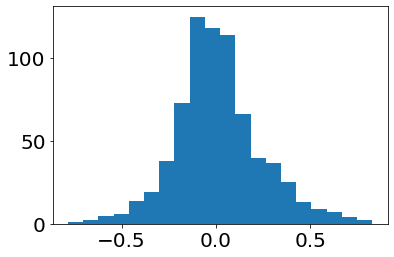

In [125]:
plt.hist(merged_df['long_pr_at_l_5_x'] - merged_df['long_pr_at_l_5_y'], bins=20)

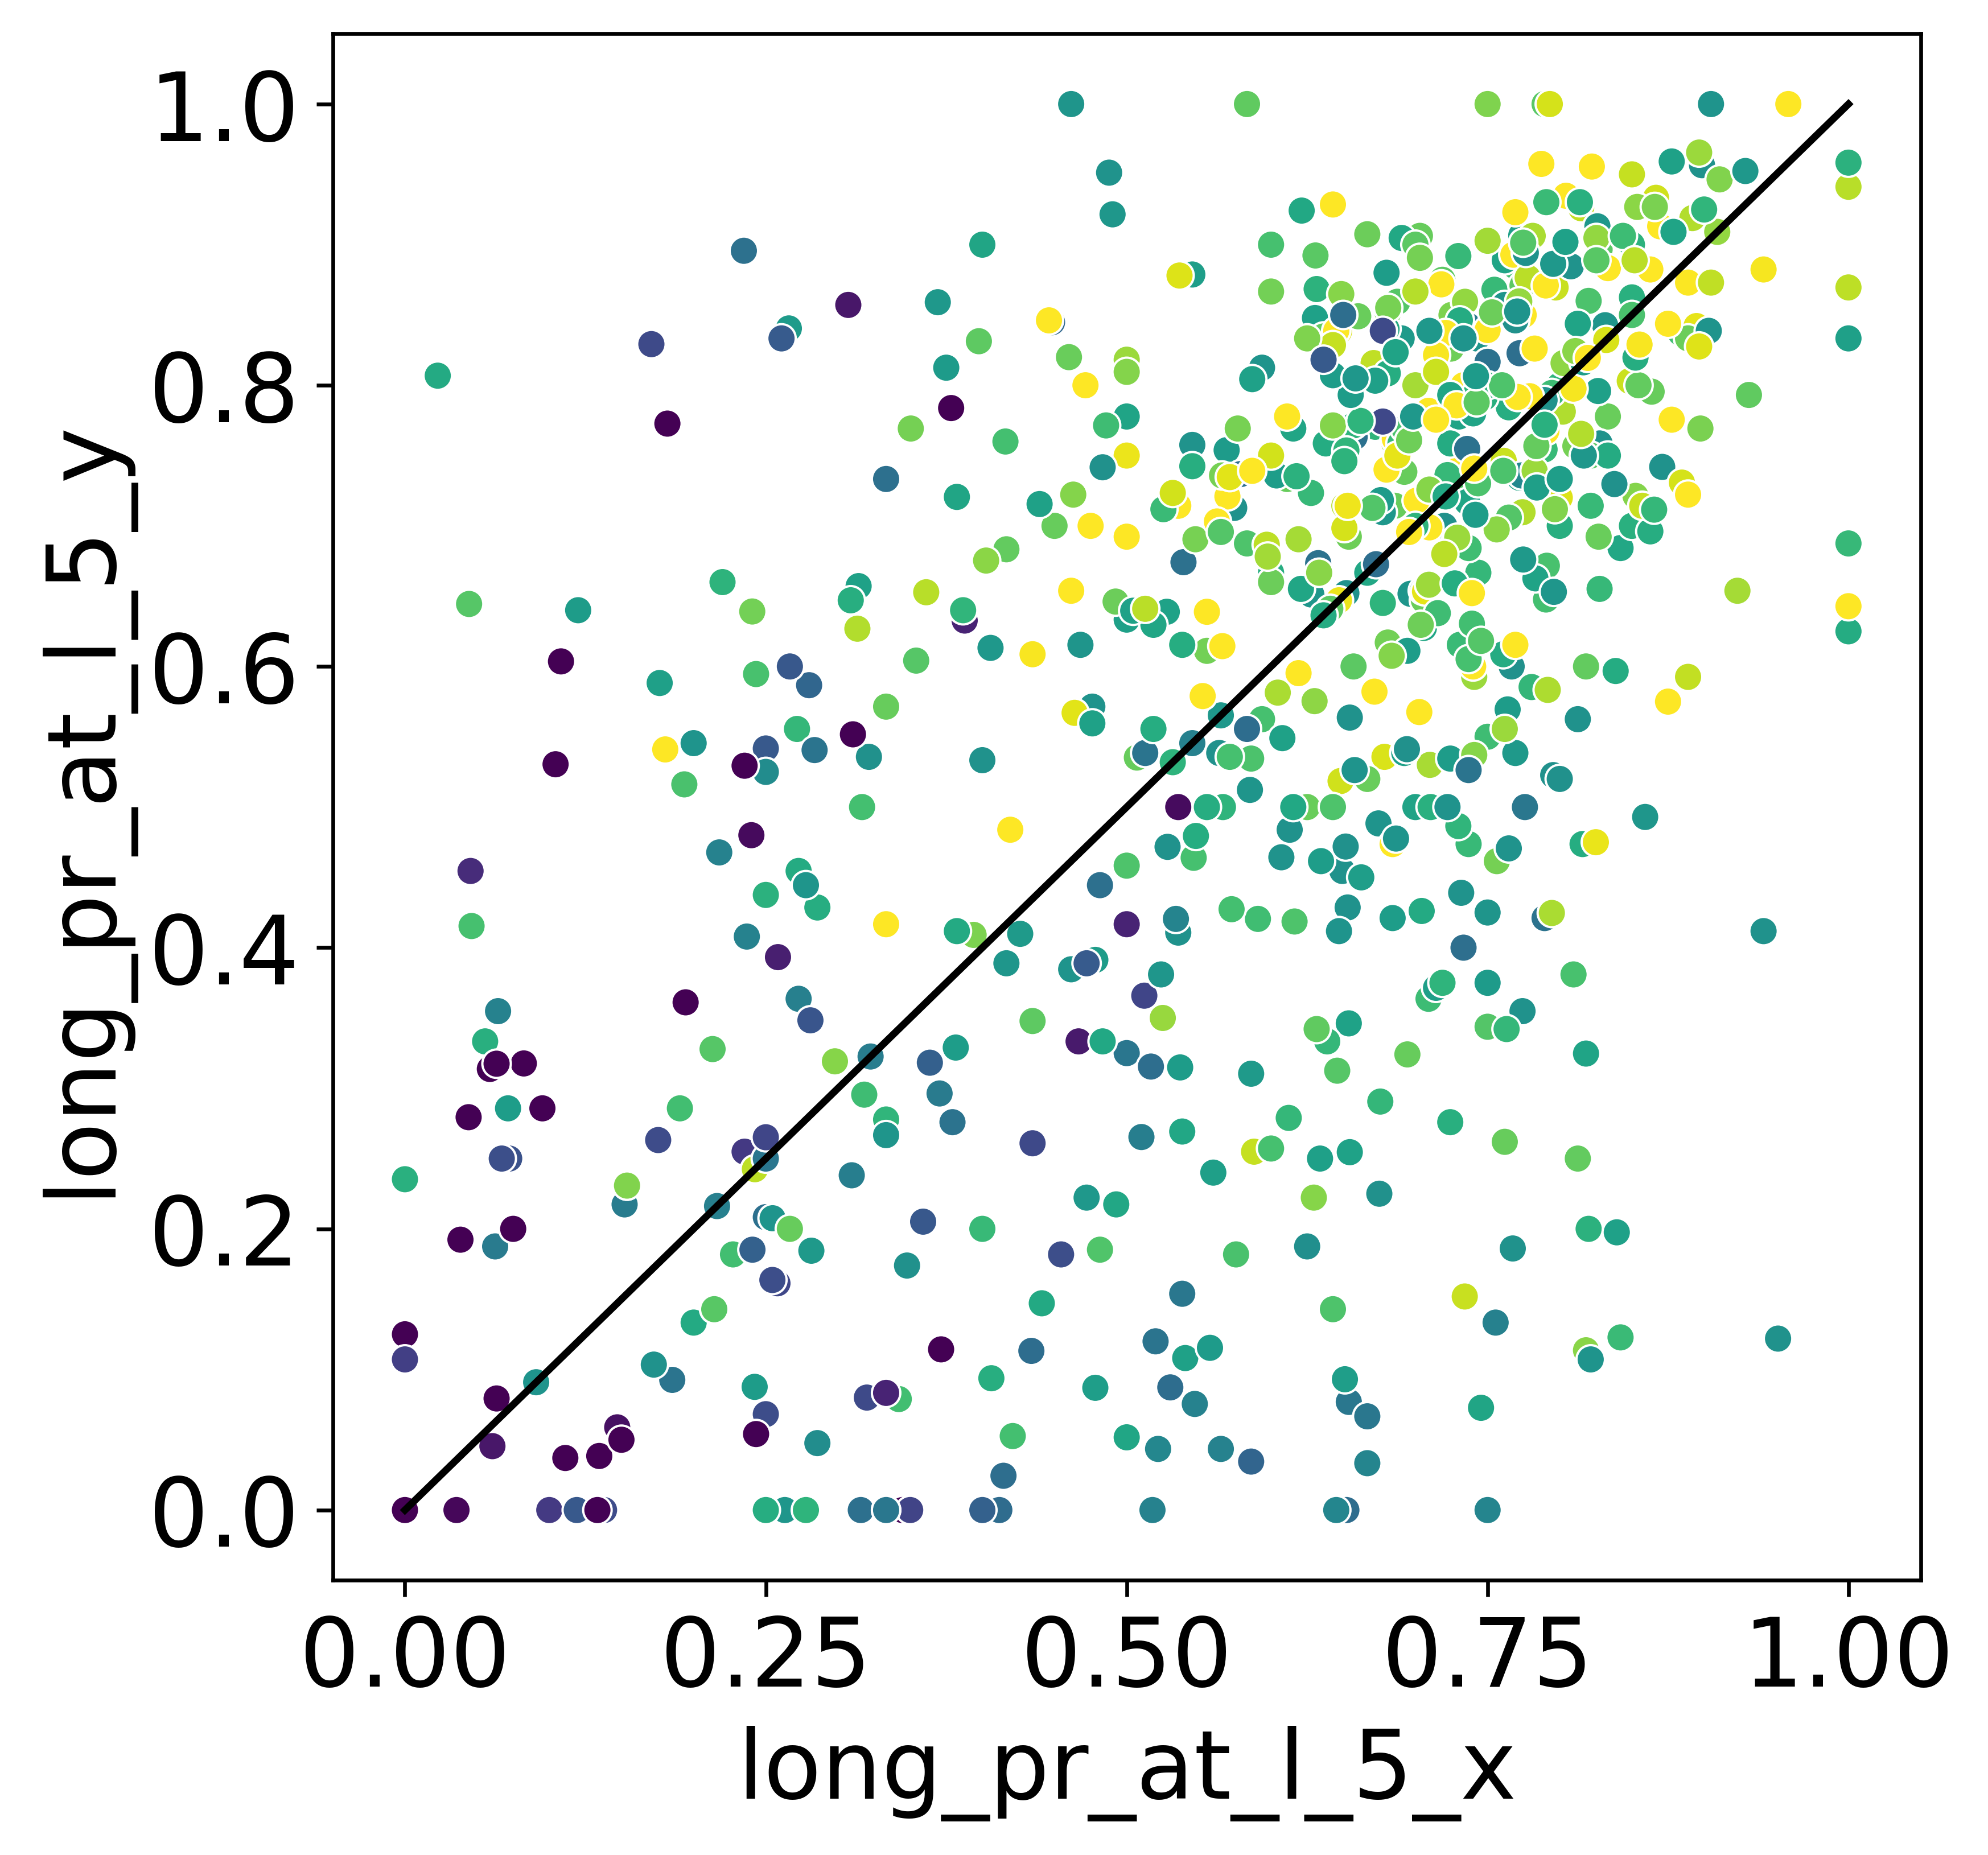

In [139]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(6, 6), dpi=600)
sns.scatterplot(x='long_pr_at_l_5_x', 
                y='long_pr_at_l_5_y', 
                hue='num_seqs_x', 
                data=merged_df, 
                legend=False, 
                palette='viridis',
                hue_norm=LogNorm(200, 20000))
plt.plot([0, 1], [0, 1], c="k")

In [130]:
for key in ['long_pr_at_l_5_x', 'long_pr_at_l_5_y', 'long_pr_at_l_2_x', 'long_pr_at_l_2_y']:
    print(merged_df[key].median())

0.6509782373905182
0.6470588445663452
0.4974747449159622
0.48318377137184143


<Figure size 3600x1200 with 0 Axes>

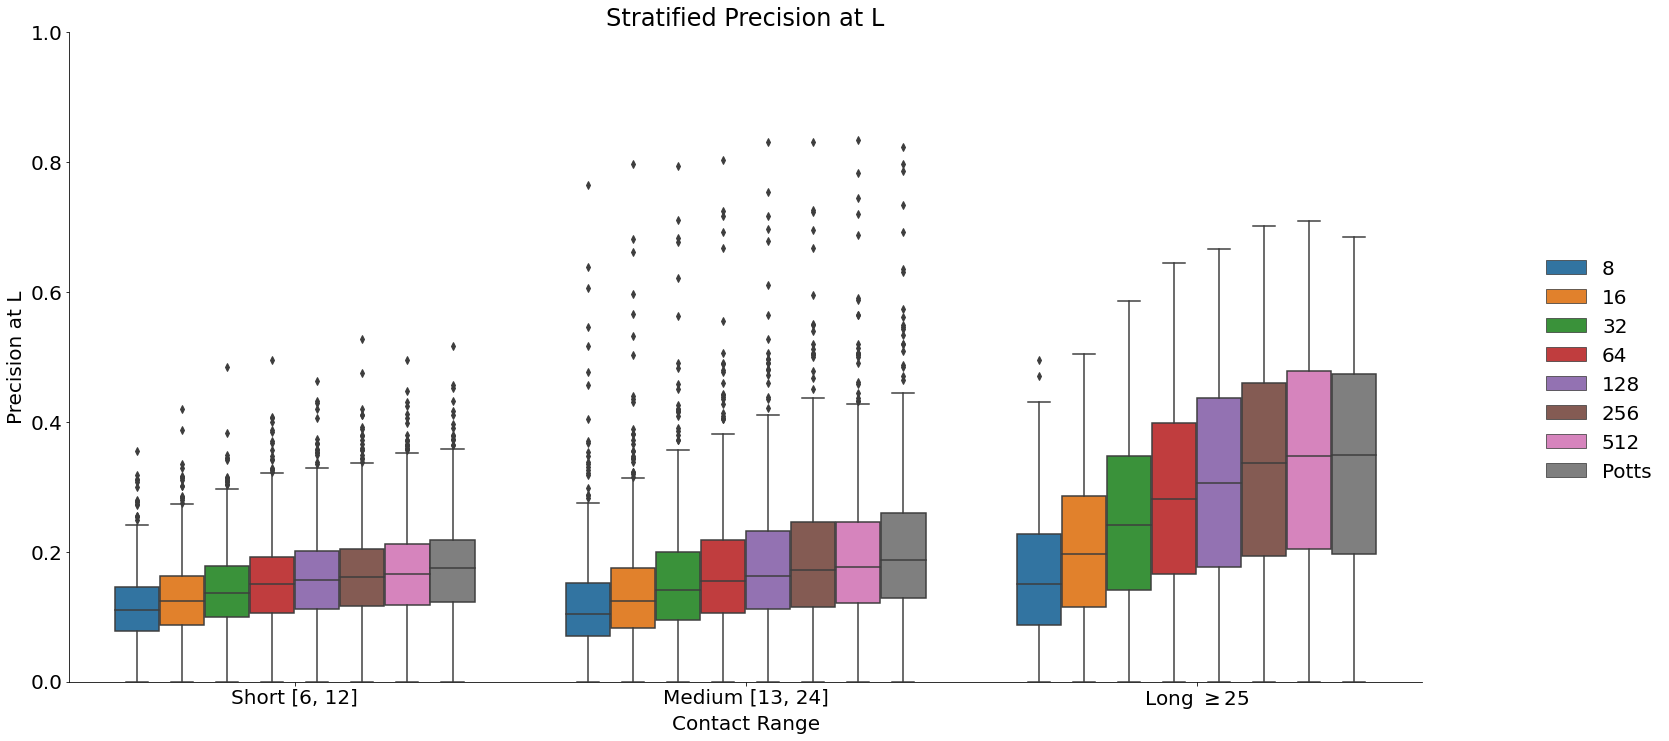

In [175]:
# gremlin vs fatt
gremnum_df = grem_df.copy()
gremnum_df['num_attention_heads'] = 1024
gremfatt_df = pd.concat([fatt_df, gremnum_df])

plt.figure(figsize = (6, 6/3), dpi=600)
melted_df = pd.melt(gremfatt_df, id_vars=['num_attention_heads'], value_vars=['short_pr_at_l', 'medium_pr_at_l', 'long_pr_at_l'])

g = sns.catplot(x="variable", 
                y="value", 
                hue="num_attention_heads",
                data=melted_df, 
                kind="box",
                height=10, 
                aspect=2)
plt.title('Stratified Precision at L')
g._legend.set_title('')
g.set_xticklabels(['Short [6, 12]', 'Medium [13, 24]', r'Long $\geq 25$'])
plt.ylabel('Precision at L')
plt.xlabel('Contact Range')

new_labels = [str(x) for x in [8, 16, 32, 64, 128, 256, 512]] + ['Potts']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.ylim([0, 1])
plt.savefig('stratified_precision_head_sweep_p_at_l.pdf', dpi=600, bbox_inches="tight")

<Figure size 3600x1200 with 0 Axes>

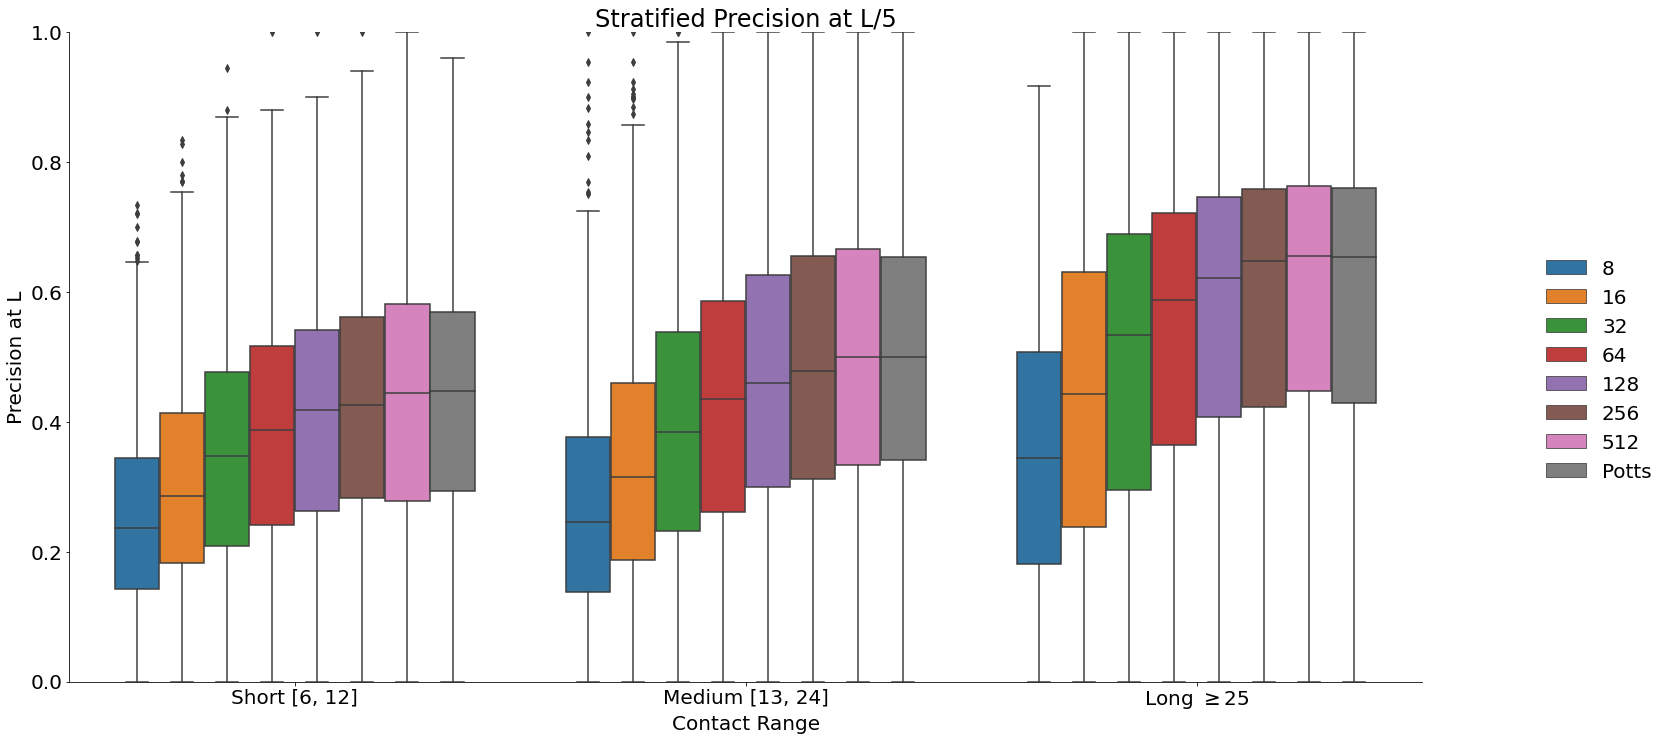

In [176]:
# gremlin vs fatt
gremnum_df = grem_df.copy()
gremnum_df['num_attention_heads'] = 1024
gremfatt_df = pd.concat([fatt_df, gremnum_df])

plt.figure(figsize = (6, 6/3), dpi=600)
melted_df = pd.melt(gremfatt_df, id_vars=['num_attention_heads'], value_vars=['short_pr_at_l_5', 'medium_pr_at_l_5', 'long_pr_at_l_5'])

g = sns.catplot(x="variable", 
                y="value", 
                hue="num_attention_heads",
                data=melted_df, 
                kind="box",
                height=10, 
                aspect=2)
plt.title('Stratified Precision at L/5')
g._legend.set_title('')
g.set_xticklabels(['Short [6, 12]', 'Medium [13, 24]', r'Long $\geq 25$'])
plt.ylabel('Precision at L')
plt.xlabel('Contact Range')

new_labels = [str(x) for x in [8, 16, 32, 64, 128, 256, 512]] + ['Potts']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.ylim([0, 1])
plt.savefig('stratified_precision_head_sweep_p_at_l_5.pdf', dpi=600, bbox_inches="tight")